In [1]:
import deimos
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
import random as rd
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
import sys
sys.path.append("../src/")
sys.path.append("D:/metabolome_inference/metabolome_inference/src/")
from integrAitor import rawData,integrAitor,Classifier,Smoother,normalizeMatrix,safeNormalize
import detection_helper
import scipy.stats as stats
import seaborn as sb


In [2]:
datadir = "../data/mzMLs/"
resolution = 100


In [3]:
ms1ppm = 10
peakWidth = (15,83)
s2n = 2
noise = 10
det = detection_helper.PeakList()
#det.runXCMS(datadir, "xcms_peak_list.csv", "negative", ms1ppm, peakWidth,s2n=s2n,noise=noise)
det.readXCMSPeakList(datadir+"xcms_peak_list.csv")
peakList = pd.DataFrame(det.peakList)
peakList

mz  rt_start    rt_end isotope_xcms            adduct_xcms  \
1      68.995954  0.738486  0.756935          NaN                    NaN   
2      68.996105  0.948315  0.948315          NaN  [M-H-C5H8O4]- 202.048   
3      71.014253  0.984903  0.989476          NaN                    NaN   
4      71.014120  7.740167  7.744169          NaN        [M+Cl]- 36.0428   
5      71.014144  5.912456  5.916438          NaN                    NaN   
...          ...       ...       ...          ...                    ...   
5413  868.350668  4.713234  4.720345          NaN                    NaN   
5414  872.116647  6.582350  6.599948    [431][M]-     [M-2H+Na]- 851.139   
5415  873.119962  6.590824  6.608904  [431][M+1]-                    NaN   
5416  878.820516  8.815338  8.917312          NaN                    NaN   
5417  885.120741  8.303068  8.308650          NaN         [M-H]- 886.129   

      peak group  M3T.Std_neg_DDA_1mz.mzML  M3T.Std_neg_DDA_3mz.mzML  \
1            399             125500.017205             145428.903653   
2            229               3756.034596               4948.401458   
3            276              98038.502354             137598.752439   
4              9             375636.026246             430469.825578   
5            755             244631.664618             268449.114918   
...          ...                       ...                       ...   
5413        1568              17721.857497              27009.702575   
5414          33             155022.159191             176981.436507   
5415          33              40621.557094              39228.963579   
5416         195             172335.031717             335216.588857   
5417        2422              26995.024184              29451.483581   

      M3T.Std_neg_DDA_5mz.mzML  
1                190195.167147  
2                  8830.234237  
3                 76442.457325  
4                428057.439792  
5                266005.621005  
...                        ...  
5413              30205.486971  
5414             165159.185668  
5415              44046.065786  
5416             257736.863775  
5417              23614.289941  

[5417 rows x 9 columns]

In [4]:
files = [x for x in os.listdir(datadir) if ".mzML" in x]
print(files)
raw_data = {}
for file in files:
    temp = rawData()
    temp.readRawDataFile(datadir + file,ms1ppm)
    raw_data[file] = temp
    

['M3T-Std_neg_DDA_1mz.mzML', 'M3T-Std_neg_DDA_3mz.mzML', 'M3T-Std_neg_DDA_5mz.mzML']


In [5]:
#format X
if __name__ == "__main__":
    integ = integrAitor(numCores = 20,resolution=resolution)
    rts = (peakList["rt_start"].values/2) + (peakList["rt_end"].values/2)
    X = integ.makeDataMatrix([raw_data[file] for file in files],peakList["mz"].values,
                             rts - .5,
                             rts +.5)
print(X.shape)

forming matrix |██████████████████████████████████████████████████| 100.0% 
(16251, 100)


In [6]:
X_train,X_test = train_test_split(X,test_size=.2,shuffle=True)

In [7]:
if __name__ == "__main__":
    X_smoothed,_,_,_ = integ.curatePeaks(X_train)

fitting smoother...
Epoch 1/10
183/183 [==============================] - 5s 23ms/step - loss: 0.4852 - mean_absolute_error: 0.3483 - val_loss: 0.0585 - val_mean_absolute_error: 0.0118
Epoch 2/10
183/183 [==============================] - 4s 20ms/step - loss: 0.0567 - mean_absolute_error: 0.0102 - val_loss: 0.0541 - val_mean_absolute_error: 0.0079
Epoch 3/10
183/183 [==============================] - 4s 20ms/step - loss: 0.0540 - mean_absolute_error: 0.0076 - val_loss: 0.0534 - val_mean_absolute_error: 0.0072
Epoch 4/10
183/183 [==============================] - 4s 20ms/step - loss: 0.0533 - mean_absolute_error: 0.0069 - val_loss: 0.0524 - val_mean_absolute_error: 0.0060
Epoch 5/10
183/183 [==============================] - 4s 20ms/step - loss: 0.0523 - mean_absolute_error: 0.0056 - val_loss: 0.0515 - val_mean_absolute_error: 0.0046
Epoch 6/10
183/183 [==============================] - 4s 20ms/step - loss: 0.0516 - mean_absolute_error: 0.0044 - val_loss: 0.0513 - val_mean_absolute_erro

539/539 [==============================] - 3s 5ms/step - loss: 0.0830 - mean_absolute_error: 0.0310 - val_loss: 0.0870 - val_mean_absolute_error: 0.0396
Epoch 10/10
539/539 [==============================] - 3s 5ms/step - loss: 0.0782 - mean_absolute_error: 0.0290 - val_loss: 0.0790 - val_mean_absolute_error: 0.0353
round 5: 713 unclassified features
Epoch 1/10
539/539 [==============================] - 3s 5ms/step - loss: 0.6825 - mean_absolute_error: 0.4814 - val_loss: 0.7370 - val_mean_absolute_error: 0.5422
Epoch 2/10
539/539 [==============================] - 3s 5ms/step - loss: 0.5725 - mean_absolute_error: 0.3720 - val_loss: 0.5428 - val_mean_absolute_error: 0.3340
Epoch 3/10
539/539 [==============================] - 3s 5ms/step - loss: 0.2874 - mean_absolute_error: 0.1236 - val_loss: 0.2654 - val_mean_absolute_error: 0.1213
Epoch 4/10
539/539 [==============================] - 3s 5ms/step - loss: 0.1454 - mean_absolute_error: 0.0529 - val_loss: 0.1727 - val_mean_absolute_error

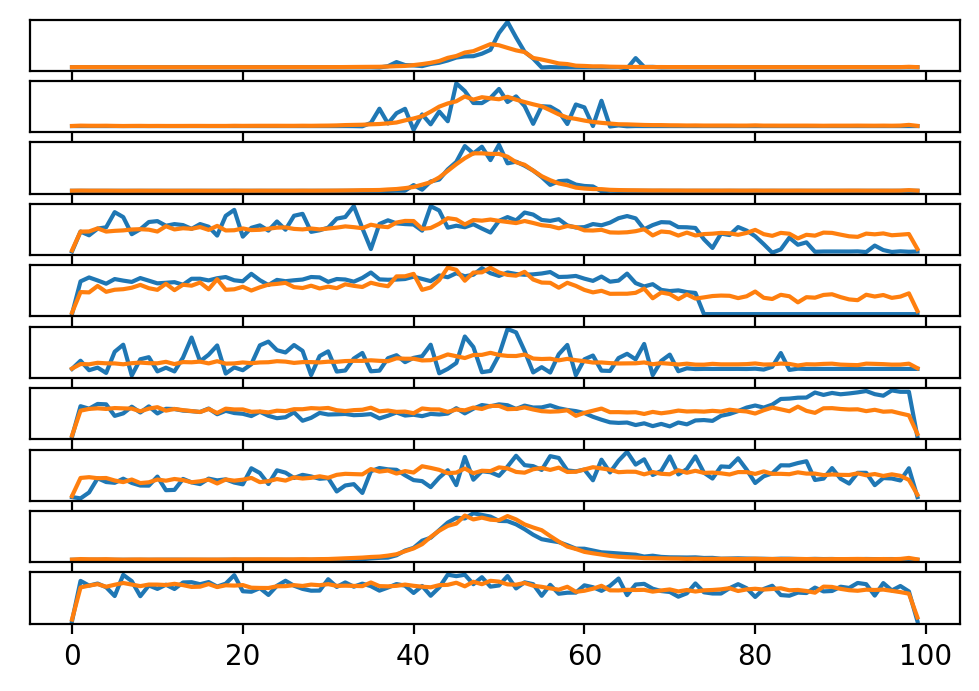

In [8]:
randomInts = rd.sample(list(range(len(X_train))),k=10)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(safeNormalize(X_train[x]),label="original")
    ax.plot(X_smoothed[x],label="output")
    ax.set_yticks([],[])
    #ax.legend()

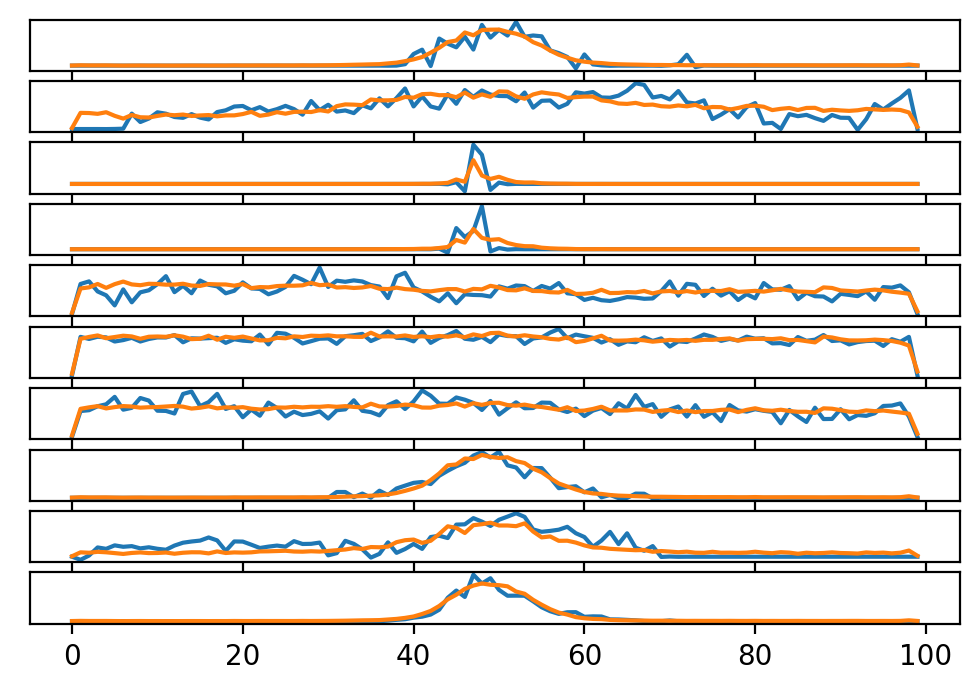

In [9]:
randomInts = rd.sample(list(range(len(X_test))),k=10)
fig, axes = plt.subplots(10,1)
X_test_smoothed = integ.smoother.predict(normalizeMatrix(X_test))
for x,ax in zip(randomInts,axes):
    ax.plot(safeNormalize(X_test[x]),label="original")
    ax.plot(X_test_smoothed[x],label="output")
    ax.set_yticks([],[])
    #ax.legend()

In [10]:
if __name__ == "__main__":
    X_smoothed,tics,y,progress = integ.curatePeaks(X)

fitting smoother...
Epoch 1/10
229/229 [==============================] - 6s 21ms/step - loss: 0.4522 - mean_absolute_error: 0.3219 - val_loss: 0.0542 - val_mean_absolute_error: 0.0112
Epoch 2/10
229/229 [==============================] - 4s 19ms/step - loss: 0.0563 - mean_absolute_error: 0.0092 - val_loss: 0.0516 - val_mean_absolute_error: 0.0089
Epoch 3/10
229/229 [==============================] - 4s 19ms/step - loss: 0.0544 - mean_absolute_error: 0.0074 - val_loss: 0.0510 - val_mean_absolute_error: 0.0085
Epoch 4/10
229/229 [==============================] - 5s 20ms/step - loss: 0.0537 - mean_absolute_error: 0.0068 - val_loss: 0.0489 - val_mean_absolute_error: 0.0061
Epoch 5/10
229/229 [==============================] - 5s 20ms/step - loss: 0.0522 - mean_absolute_error: 0.0044 - val_loss: 0.0479 - val_mean_absolute_error: 0.0049
Epoch 6/10
229/229 [==============================] - 5s 20ms/step - loss: 0.0517 - mean_absolute_error: 0.0039 - val_loss: 0.0476 - val_mean_absolute_erro

674/674 [==============================] - 4s 5ms/step - loss: 0.2827 - mean_absolute_error: 0.1498 - val_loss: 0.0423 - val_mean_absolute_error: 0.0167
Epoch 10/10
674/674 [==============================] - 3s 5ms/step - loss: 0.2695 - mean_absolute_error: 0.1369 - val_loss: 0.0356 - val_mean_absolute_error: 0.0138
round 5: 742 unclassified features
Epoch 1/10
676/676 [==============================] - 4s 5ms/step - loss: 0.6656 - mean_absolute_error: 0.4499 - val_loss: 0.6462 - val_mean_absolute_error: 0.4429
Epoch 2/10
676/676 [==============================] - 3s 5ms/step - loss: 0.3275 - mean_absolute_error: 0.1564 - val_loss: 0.2074 - val_mean_absolute_error: 0.0905
Epoch 3/10
676/676 [==============================] - 3s 5ms/step - loss: 0.1233 - mean_absolute_error: 0.0477 - val_loss: 0.1336 - val_mean_absolute_error: 0.0620
Epoch 4/10
676/676 [==============================] - 3s 5ms/step - loss: 0.0900 - mean_absolute_error: 0.0361 - val_loss: 0.1028 - val_mean_absolute_error

[16251, 1097, 913, 827, 742]


Text(0, 0.5, 'log10(# of uncertain peaks)')

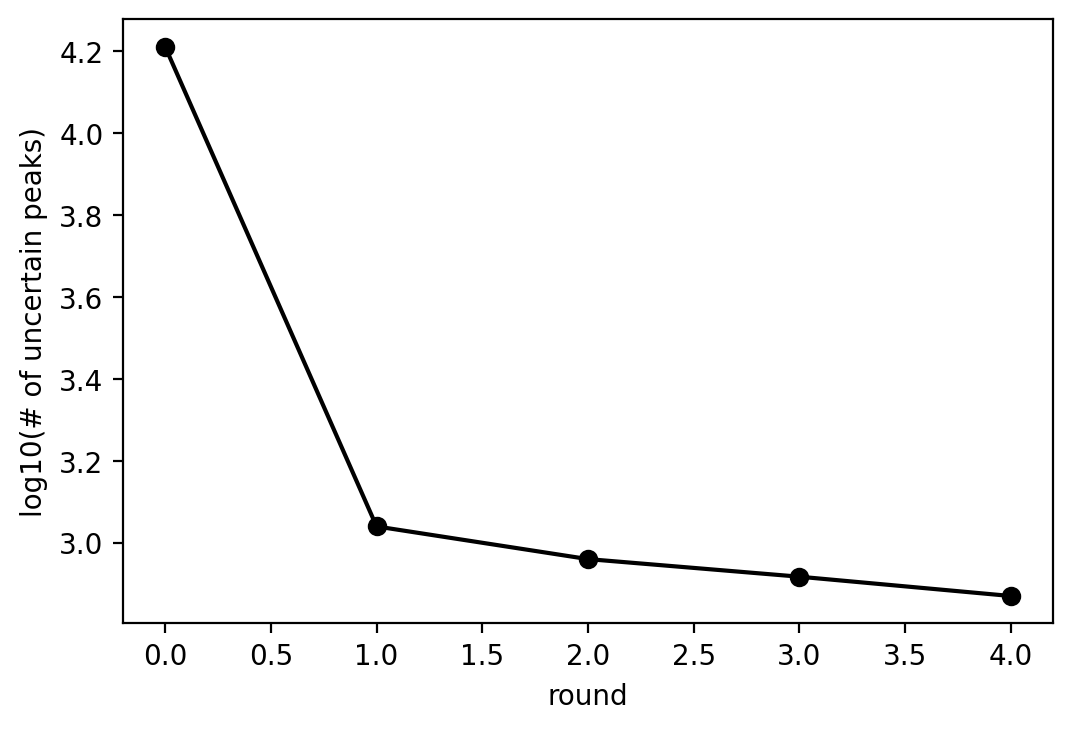

In [11]:
print(progress)
plt.plot(list(range(len(progress))),np.log10(progress),color="black")
plt.scatter(list(range(len(progress))),np.log10(progress),color="black")
plt.xlabel("round")
plt.ylabel("log10(# of uncertain peaks)")

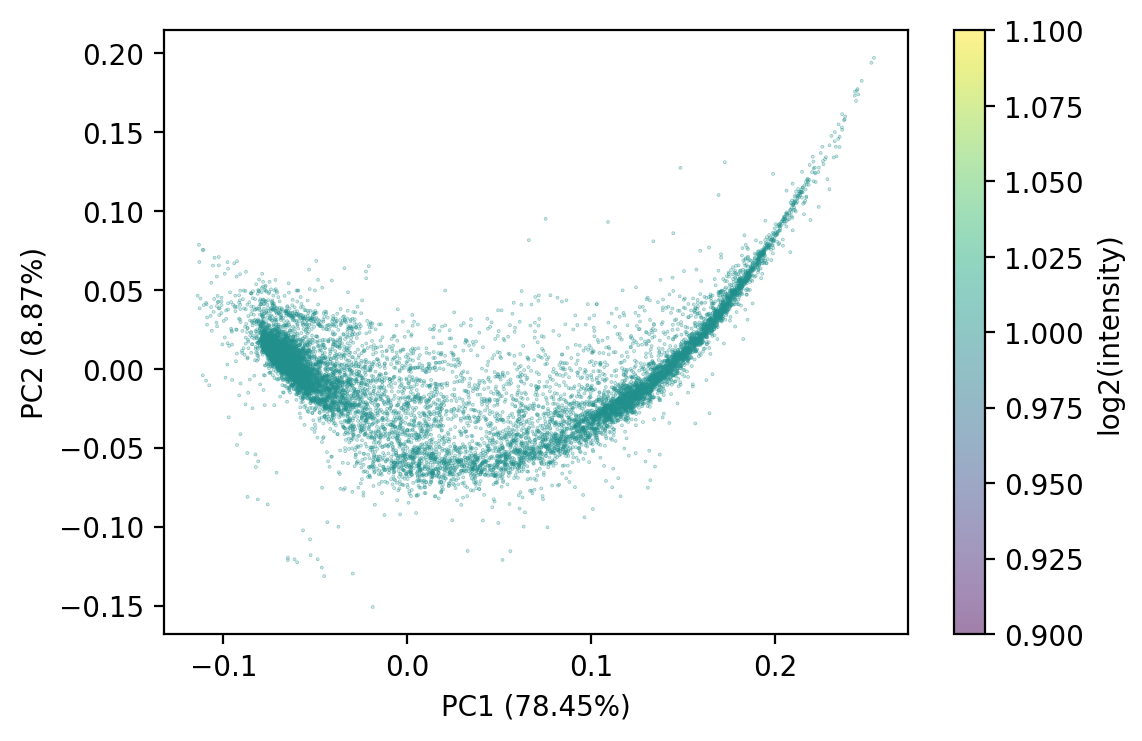

In [12]:
pca = PCA(2)
loads = pca.fit_transform(X_smoothed)
plt.scatter(loads[:,0],loads[:,1],c=tics,s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="log2(intensity)")

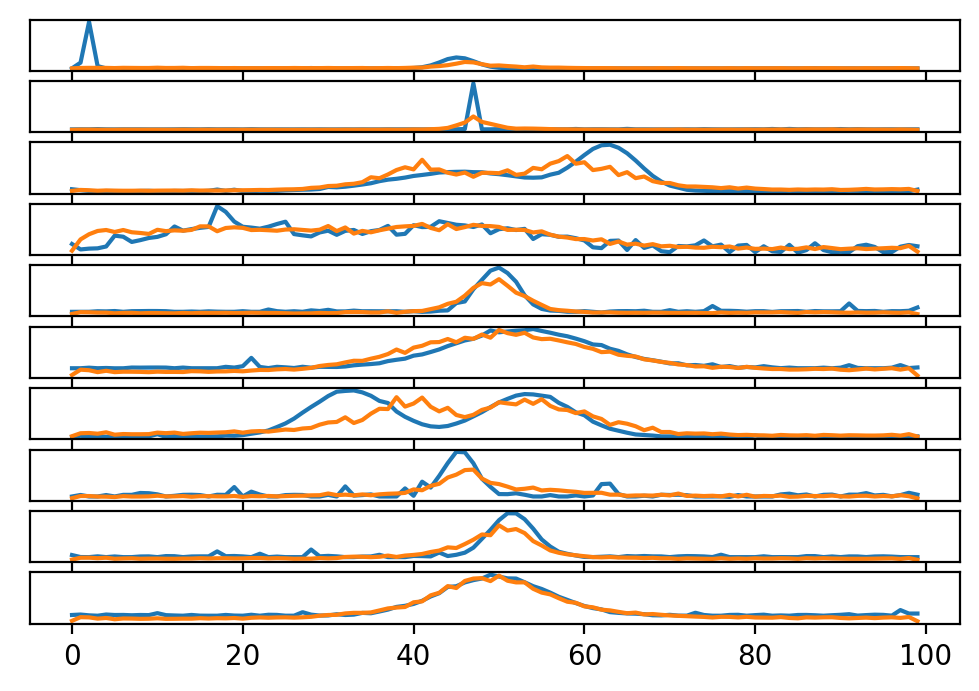

In [13]:
randomInts = rd.sample(list(range(len(X))),k=10)
X_signal,_ = integ.generateSignalPeaks(normalizeMatrix(X),[np.sum(x) for x in X],[[0,.4],[.6,1.0]])
#X_signal,_ = integ.generateSignalPeaks(normalizeMatrix(X),tics,[[0,.4],[.6,1.0]])
X_signal_smoothed = integ.smoother.predict(X_signal)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(X_signal[x],label="original")
    ax.plot(X_signal_smoothed[x],label="output")
    ax.set_yticks([],[])


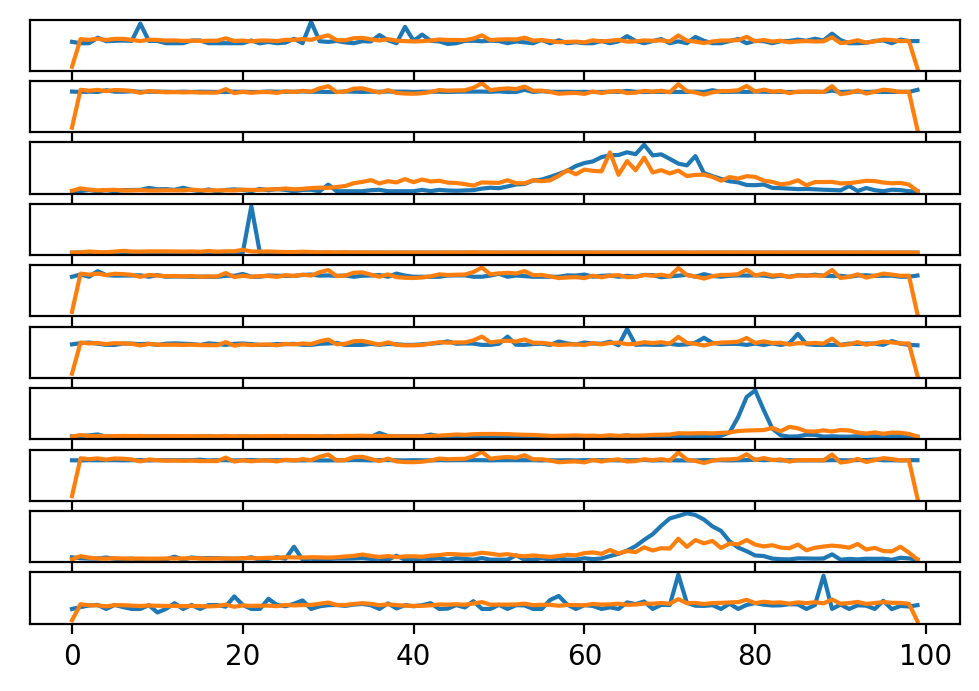

In [14]:
randomInts = rd.sample(list(range(len(X))),k=10)

X_noise,_ = integ.generateFalsePeaks(normalizeMatrix(X),[np.sum(x) for x in X], [[0,.4],[.6,1.0]])
#X_noise,_ = integ.generateFalsePeaks(normalizeMatrix(X),tics, [[0,.4],[.6,1.0]])

X_noise_smoothed = integ.smoother.predict(X_noise)
fig, axes = plt.subplots(10,1)
for x,ax in zip(randomInts,axes):
    ax.plot(X_noise[x],label="original")
    ax.plot(X_noise_smoothed[x],label="output")
    ax.set_yticks([],[])


[0.18612966 0.0745422 ]


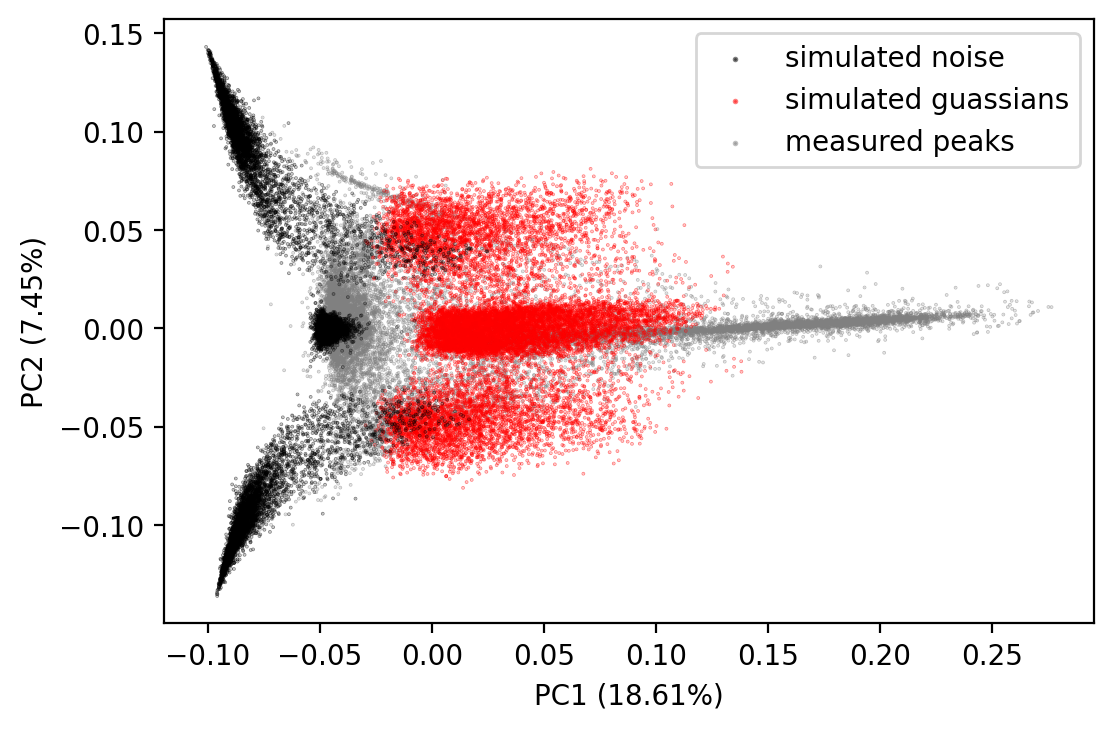

In [15]:
tmp = np.concatenate((X_smoothed,normalizeMatrix(X_signal),normalizeMatrix(X_noise)))
cs = ["grey" for _ in X] + ["red" for _ in X_signal] + ["black" for _ in X_noise]
loads = pca.fit_transform(tmp)
print(pca.explained_variance_ratio_[:2])
def getColor(s):
    if s < 0.01:
        return "black"
    if s > 0.99:
        return "red"
    else:
        return "grey"
plt.scatter([0],[0],color="black",label="simulated noise",s=1,alpha=.5)
plt.scatter([0],[0],color="red",label="simulated guassians",s=1,alpha=.5)
plt.scatter([0],[0],color="grey",label="measured peaks",s=1,alpha=.5)

plt.scatter(loads[:,0],loads[:,1],s=.1,alpha=.5,c=cs)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.legend()

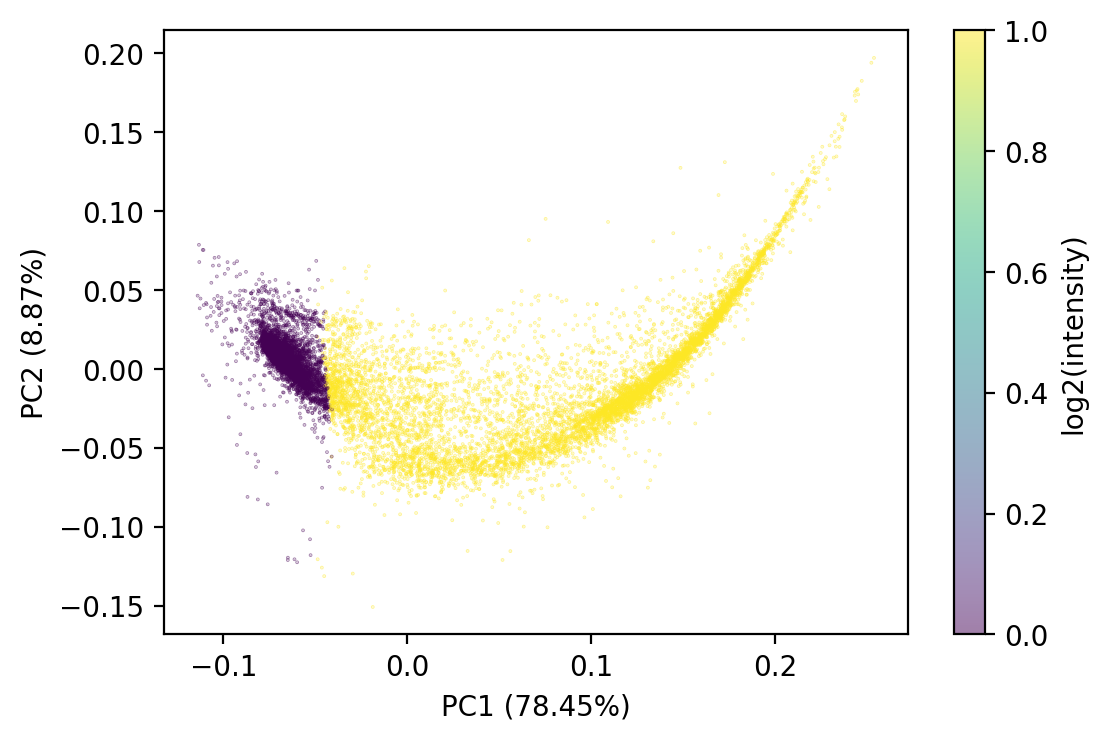

In [16]:
pca = PCA(2)
loads = pca.fit_transform(X_smoothed)
plt.scatter(loads[:,0],loads[:,1],c=y,s=.1,alpha=.5)
plt.xlabel("PC1 (" + str(np.round(100*pca.explained_variance_ratio_[0],2)) + "%)")
plt.ylabel("PC2 (" + str(np.round(100*pca.explained_variance_ratio_[1],2)) + "%)")
plt.colorbar(label="log2(intensity)")

In [17]:
ms1_peaks_curated = {file:[] for file in files}
keys = []
for file in files:
    for index in peakList.index.values:
        keys.append([file,index])
for [file,index],score in zip(keys,y):
    if score > .5:
        ms1_peaks_curated[file].append(index)
ms1_peaks_curated = {file:peakList.loc[ms1_peaks_curated[file],:] for file in files}
ms1_peaks_curated[file]

mz  rt_start    rt_end isotope_xcms         adduct_xcms  \
3      71.014253  0.984903  0.989476          NaN                 NaN   
4      71.014120  7.740167  7.744169          NaN     [M+Cl]- 36.0428   
6      71.014267  6.286609  6.295989          NaN     [M-2H]2- 144.04   
7      71.014076  5.389264  5.400897          NaN                 NaN   
8      71.014261  1.813514  1.829121          NaN  [M-H-CO2]- 116.012   
...          ...       ...       ...          ...                 ...   
5412  868.191608  3.366705  3.407427          NaN                 NaN   
5413  868.350668  4.713234  4.720345          NaN                 NaN   
5414  872.116647  6.582350  6.599948    [431][M]-  [M-2H+Na]- 851.139   
5415  873.119962  6.590824  6.608904  [431][M+1]-                 NaN   
5417  885.120741  8.303068  8.308650          NaN      [M-H]- 886.129   

      peak group  M3T.Std_neg_DDA_1mz.mzML  M3T.Std_neg_DDA_3mz.mzML  \
3            276              98038.502354             137598.752439   
4              9             375636.026246             430469.825578   
6             46             210505.389438             219282.140302   
7             11             373178.565606             401838.861572   
8             31             136483.208387             127856.130990   
...          ...                       ...                       ...   
5412           7              34350.564418              63126.152562   
5413        1568              17721.857497              27009.702575   
5414          33             155022.159191             176981.436507   
5415          33              40621.557094              39228.963579   
5417        2422              26995.024184              29451.483581   

      M3T.Std_neg_DDA_5mz.mzML  
3                 76442.457325  
4                428057.439792  
6                220450.422008  
7                357791.824358  
8                114403.778260  
...                        ...  
5412              52414.589071  
5413              30205.486971  
5414             165159.185668  
5415              44046.065786  
5417              23614.289941  

[2527 rows x 9 columns]

Text(0, 0.5, '% of features')

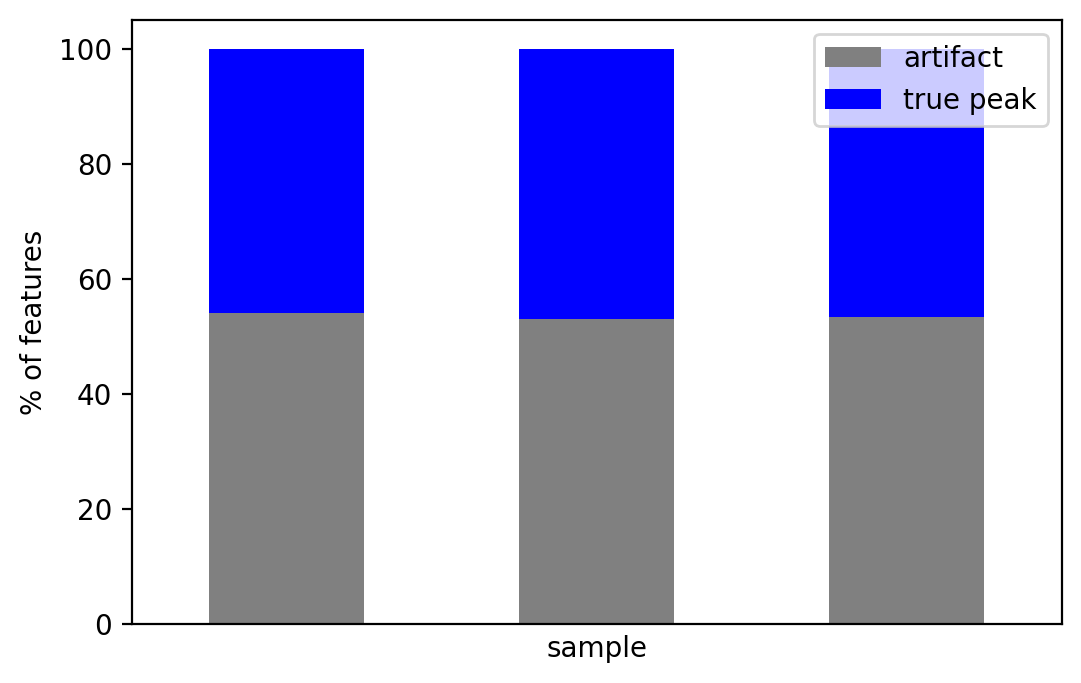

In [18]:
df = {}
for file in files:
    for index,row in peakList.iterrows():
        if index in ms1_peaks_curated[file].index.values:
            df[len(df)] = {"sample":file,"classification":"true peak"}
        else:
            df[len(df)] = {"sample":file,"classification":"artifact"}

df = pd.DataFrame.from_dict(df,orient="index")

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["grey","blue"])
plt.xticks([],[])
plt.ylabel("% of features")

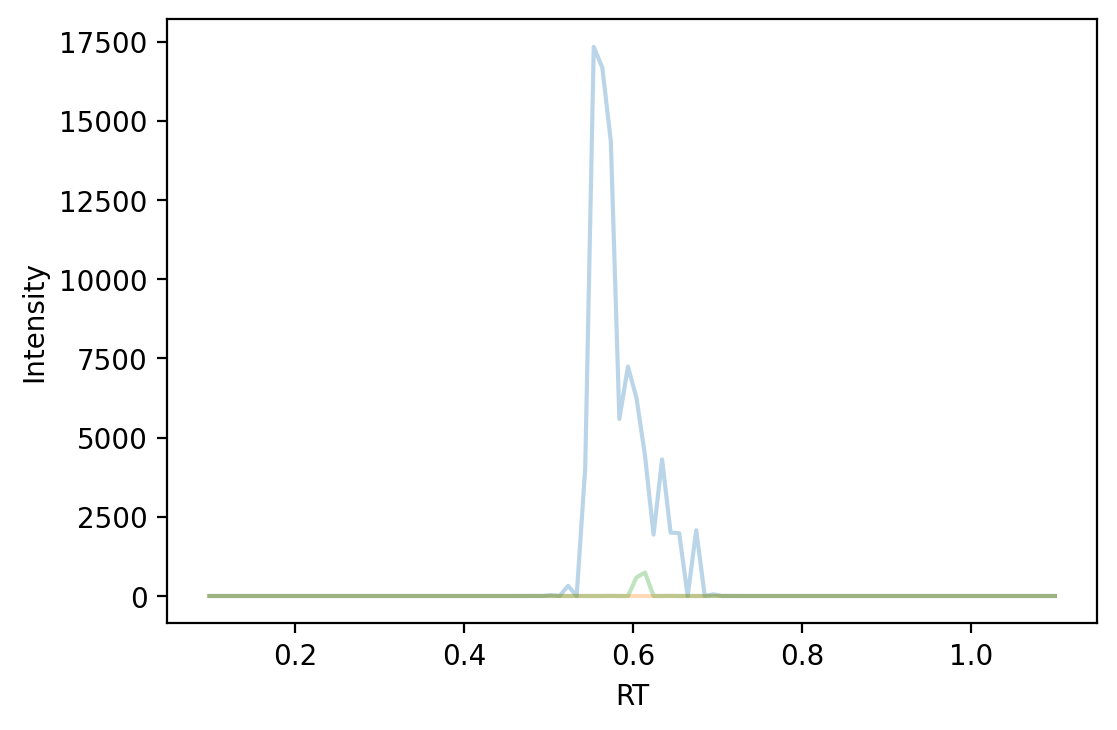

In [19]:
file = files[0]
inds = list(peakList.index.values)
rd.shuffle(inds)
for i in inds:
    if i in ms1_peaks_curated[file].index.values:
        integ.plot_overlayedEIC([raw_data[f] for f in files],ms1_peaks_curated[file].at[i,"mz"],ms1_peaks_curated[file].at[i,"rt_start"]-.5,ms1_peaks_curated[file].at[i,"rt_end"]+.5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

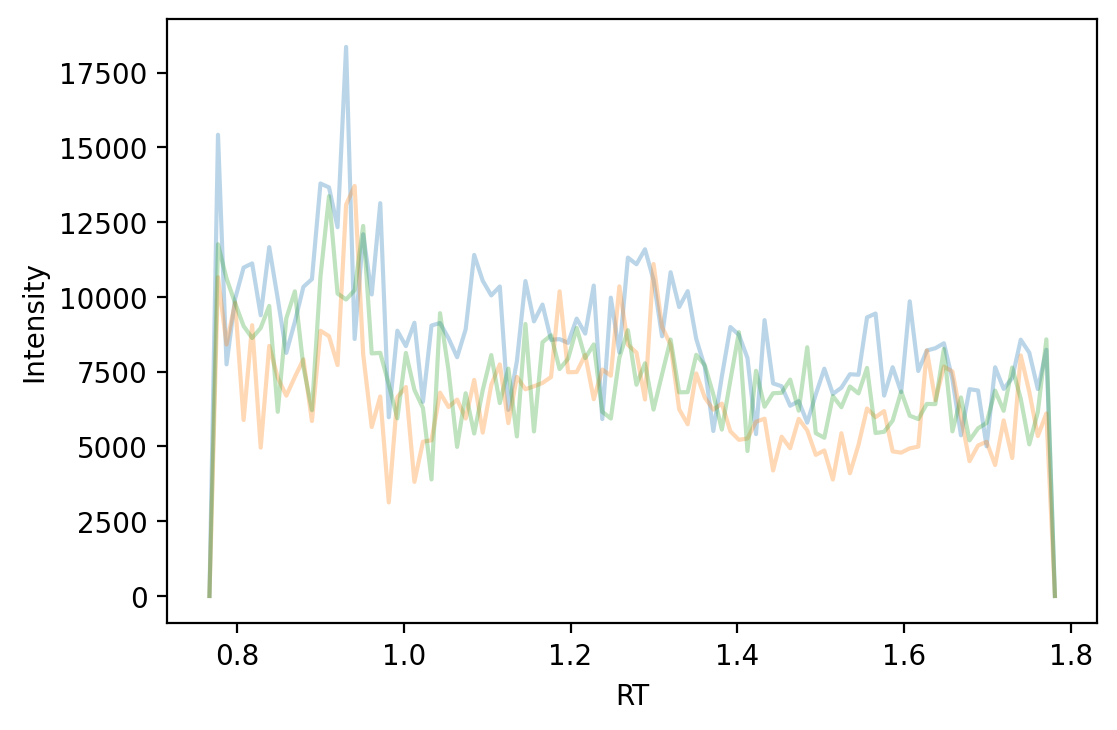

In [20]:
file = files[0]
inds = list(peakList.index.values)
rd.shuffle(inds)
for i in inds:
    if i not in ms1_peaks_curated[file].index.values:
        integ.plot_overlayedEIC([raw_data[f] for f in files],peakList.at[i,"mz"],peakList.at[i,"rt_start"]-.5,peakList.at[i,"rt_end"] + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        break

In [21]:
real_peaks = pd.read_csv("../data/peaks_neg_m3t.csv")
real_peaks

Unnamed: 0                                     Name  rt_start  rt_end  \
0            0                Fructose 1,6-bisphosphate      8.97    9.57   
1            1                              Citric acid      8.88    9.22   
2            2                          Acetoacetyl-CoA      6.39    6.87   
3            3                               Acetyl-CoA      6.31    6.75   
4            4                          Chelidamic Acid      6.85    7.46   
..         ...                                      ...       ...     ...   
66          70                                   URACIL      1.90    2.46   
67          71                                  URIDINE      2.94    3.59   
68          72  URIDINE DIPHOSPHATE-N-ACETYLGLUCOSAMINE      7.20    7.56   
69          73                                   VALINE      4.78    5.30   
70          74                             OXOGLUTARATE      7.25    7.59   

           CAS                     InChiKey  pubchemID mzCloudID  \
0     488-69-7  RNBGYGVWRKECFJ-ZXXMMSQZSA-N     445557        -1   
1      77-92-9  KRKNYBCHXYNGOX-UHFFFAOYSA-N        311      r352   
2    1420-36-6  OJFDKHTZOUZBOS-CITAKDKDSA-N      92153        -1   
3      72-89-9  ZSLZBFCDCINBPY-ZSJPKINUSA-N     444493     r4596   
4     499-51-4  XTLJJHGQACAZMS-UHFFFAOYSA-N       8743        -1   
..         ...                          ...        ...       ...   
66     66-22-8  ISAKRJDGNUQOIC-UHFFFAOYSA-N       1174     r2531   
67     58-96-8  DRTQHJPVMGBUCF-XVFCMESISA-N       6029     r1408   
68    528-04-1  LFTYTUAZOPRMMI-CFRASDGPSA-N     445675     r2920   
69     72-18-4  KZSNJWFQEVHDMF-BYPYZUCNSA-N       6287      r772   
70  22202-68-2  KPGXRSRHYNQIFN-UHFFFAOYSA-N         51      r305   

           formula          mz  
0       C6H14O12P2  338.988774  
1           C6H8O7  191.019727  
2   C25H40N7O18P3S  850.129063  
3   C23H38N7O17P3S  808.118499  
4          C7H5NO5  182.009496  
..             ...         ...  
66        C4H4N2O2  111.020001  
67       C9H12N2O6  243.062260  
68   C17H27N3O17P2  606.074295  
69        C5H11NO2  116.071703  
70          C5H6O5  145.014247  

[71 rows x 10 columns]

In [22]:
real_peaks = [[row["mz"],row["rt_start"]/2+row["rt_end"]/2,row["Name"]] for index,row in real_peaks.iterrows()]

In [23]:
plt_dict = {}
ppmTol = 5
rtTol = .5
for file in files: 
    
        
    numDetected = 0
    detectedPeaks = []
    undetectedPeaks = []

    for mz,rt,name in real_peaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        for index,row in peakList.iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-(row["rt_start"]/2 + row["rt_end"]/2)) < rtTol:
                    numDetected += 1
                    found = True
                    detectedPeaks.append([mz,rt,name])
                    break
        if not found:
            undetectedPeaks.append([mz,rt,name])
    
    numFound = 0
    
    for mz,rt,name in detectedPeaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        
        for index,row in ms1_peaks_curated[file].iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-(row["rt_start"]/2 + row["rt_end"]/2)) < rtTol:
                    found = True
                    break
        if found:
             plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"true peak","sample" : file}
        else:
             plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"artifact","sample" : file}
    for mz,rt,name in undetectedPeaks:
        plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"undetected","sample" : file}
    
   
df = pd.DataFrame.from_dict(plt_dict,orient="index")

In [24]:
df

metabolite classification                    sample
0    Fructose 1,6-bisphosphate      true peak  M3T-Std_neg_DDA_1mz.mzML
1                  Citric acid      true peak  M3T-Std_neg_DDA_1mz.mzML
2              Acetoacetyl-CoA      true peak  M3T-Std_neg_DDA_1mz.mzML
3                   Acetyl-CoA      true peak  M3T-Std_neg_DDA_1mz.mzML
4              Chelidamic Acid      true peak  M3T-Std_neg_DDA_1mz.mzML
..                         ...            ...                       ...
208                   PYRUVATE     undetected  M3T-Std_neg_DDA_5mz.mzML
209           SELENOMETHIONINE     undetected  M3T-Std_neg_DDA_5mz.mzML
210                 TRYPTOPHAN     undetected  M3T-Std_neg_DDA_5mz.mzML
211                     URACIL     undetected  M3T-Std_neg_DDA_5mz.mzML
212                     VALINE     undetected  M3T-Std_neg_DDA_5mz.mzML

[213 rows x 3 columns]

In [25]:
misClass = df[df["classification"] == "artifact"]
misClass

metabolite classification                    sample
26   HISTIDINE       artifact  M3T-Std_neg_DDA_1mz.mzML
97   HISTIDINE       artifact  M3T-Std_neg_DDA_3mz.mzML
168  HISTIDINE       artifact  M3T-Std_neg_DDA_5mz.mzML

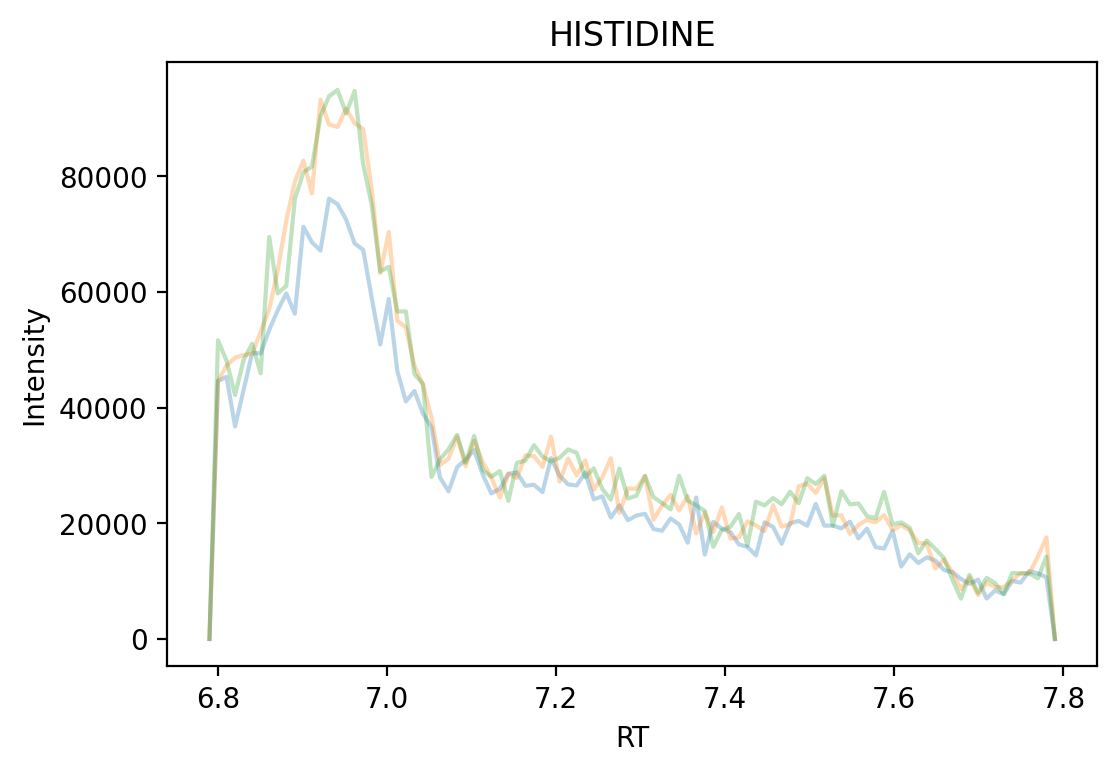

In [26]:
for mz,rt,name in real_peaks:
    if name in misClass["metabolite"].values:
        plt.figure()
        integ.plot_overlayedEIC([raw_data[file] for file in files],mz,rt-.5,rt + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        plt.title(name)

In [27]:
corClass = df[df["classification"] == "true peak"]
corClass

metabolite classification  \
0                  Fructose 1,6-bisphosphate      true peak   
1                                Citric acid      true peak   
2                            Acetoacetyl-CoA      true peak   
3                                 Acetyl-CoA      true peak   
4                            Chelidamic Acid      true peak   
..                                       ...            ...   
182                                THREONINE      true peak   
183                                TREHALOSE      true peak   
184                                  URIDINE      true peak   
185  URIDINE DIPHOSPHATE-N-ACETYLGLUCOSAMINE      true peak   
186                             OXOGLUTARATE      true peak   

                       sample  
0    M3T-Std_neg_DDA_1mz.mzML  
1    M3T-Std_neg_DDA_1mz.mzML  
2    M3T-Std_neg_DDA_1mz.mzML  
3    M3T-Std_neg_DDA_1mz.mzML  
4    M3T-Std_neg_DDA_1mz.mzML  
..                        ...  
182  M3T-Std_neg_DDA_5mz.mzML  
183  M3T-Std_neg_DDA_5mz.mzML  
184  M3T-Std_neg_DDA_5mz.mzML  
185  M3T-Std_neg_DDA_5mz.mzML  
186  M3T-Std_neg_DDA_5mz.mzML  

[132 rows x 3 columns]

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



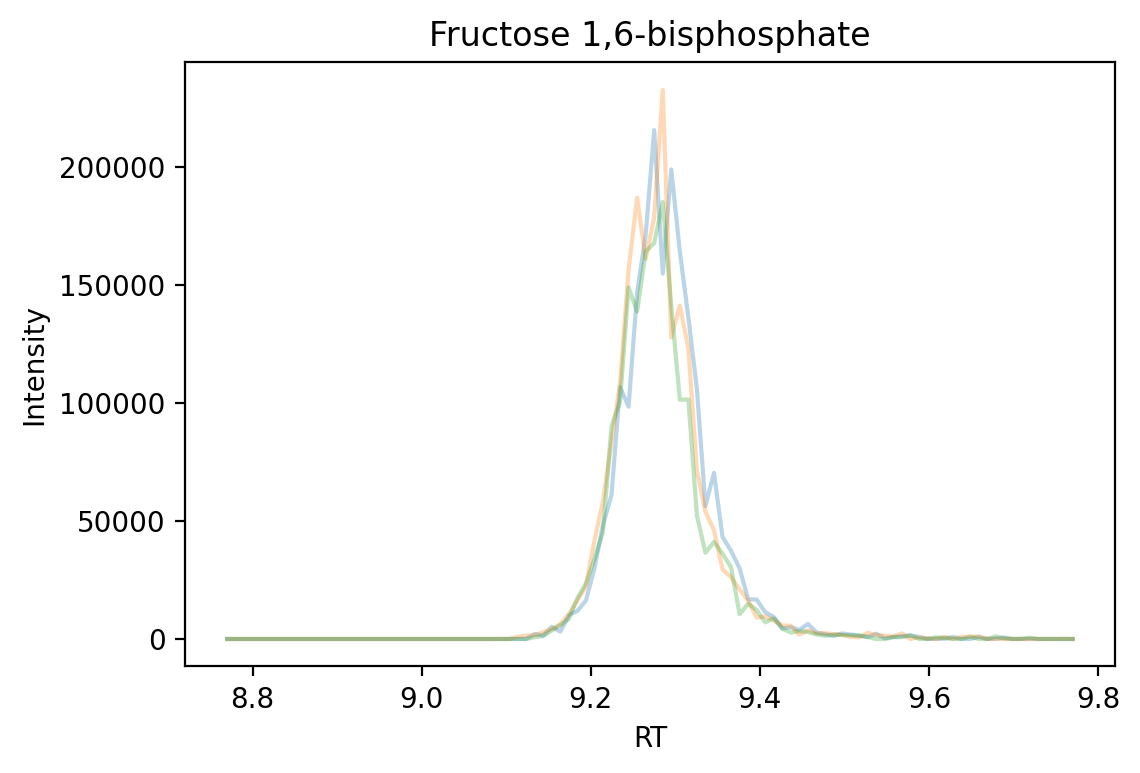

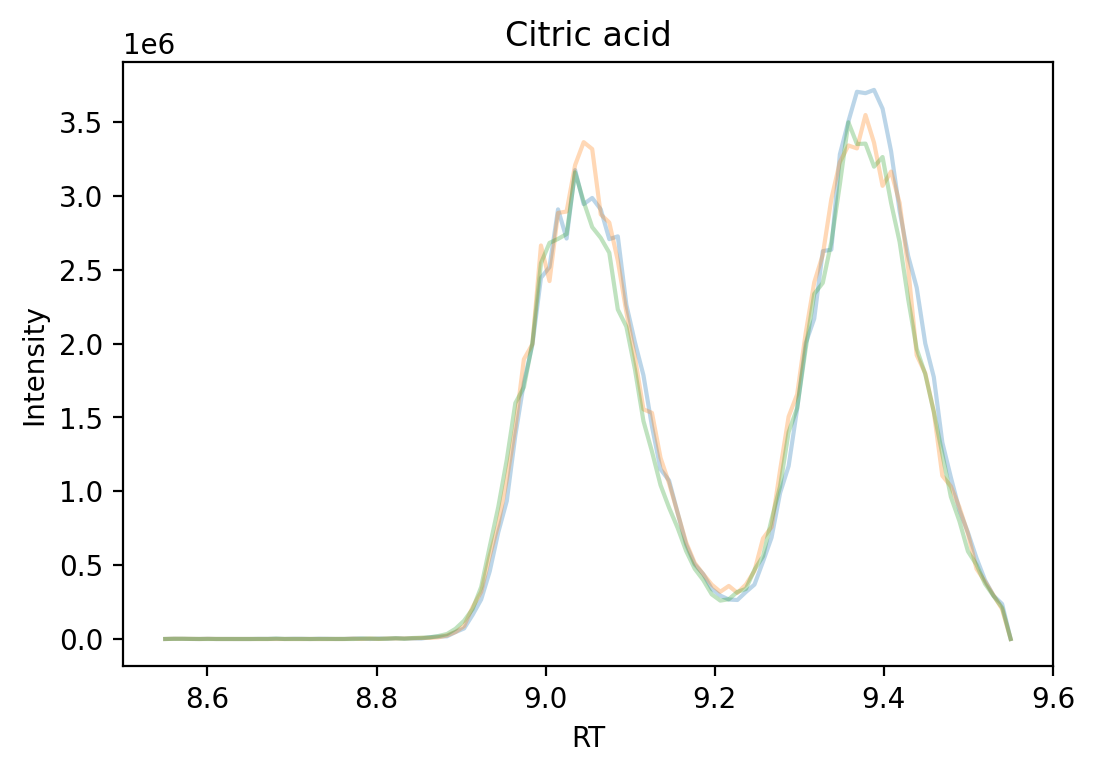

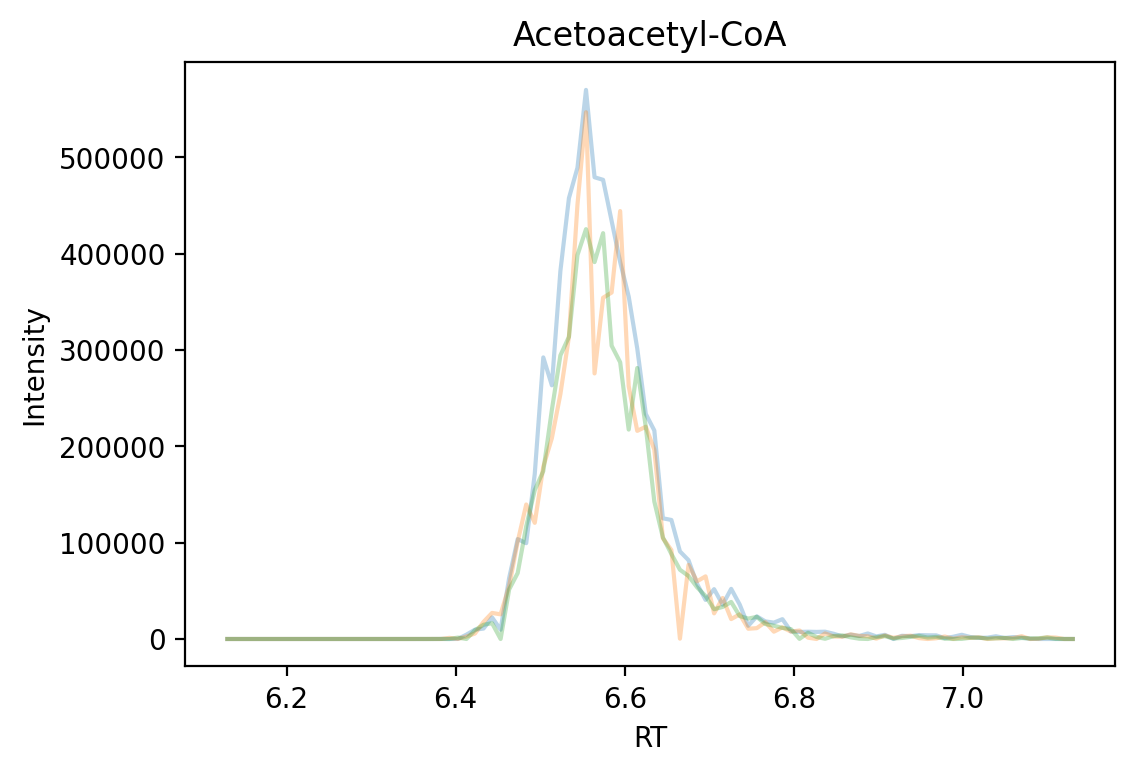

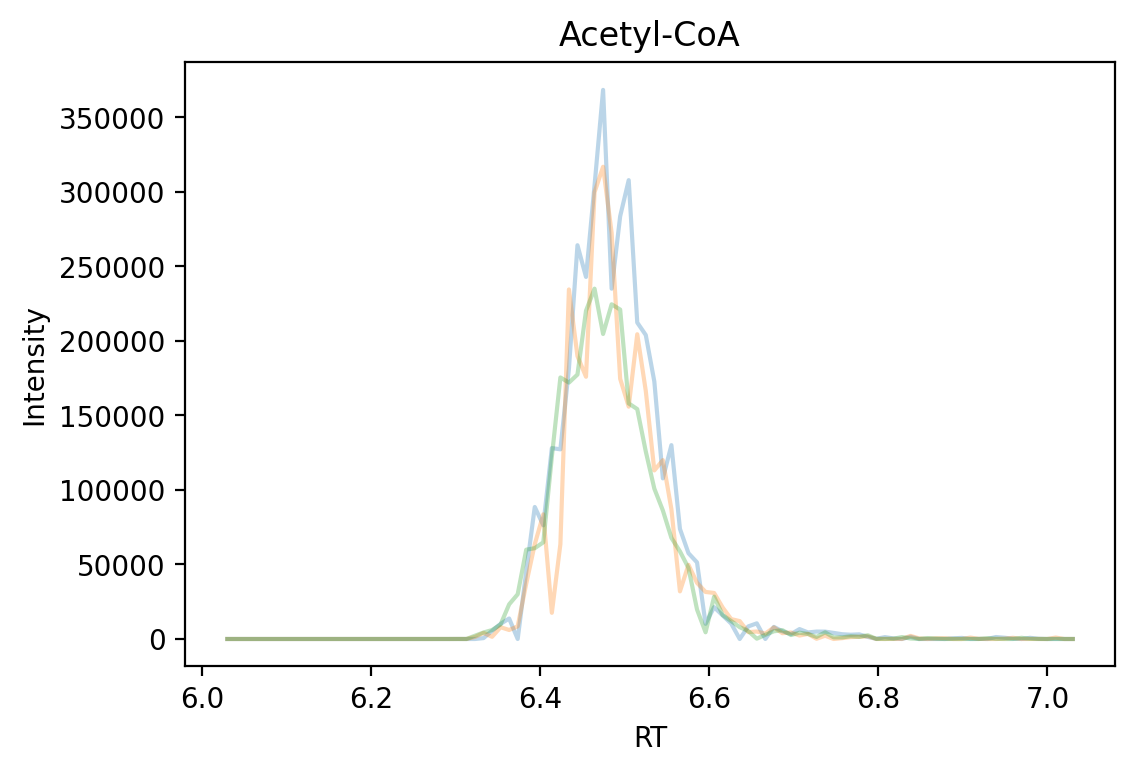

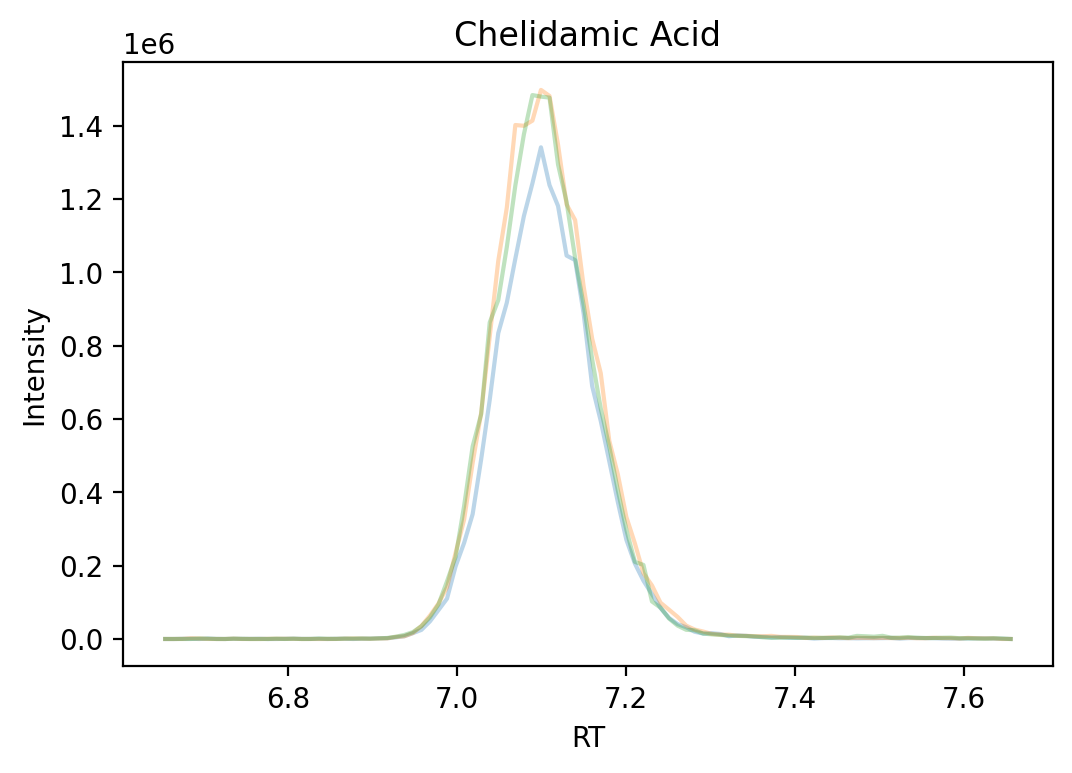

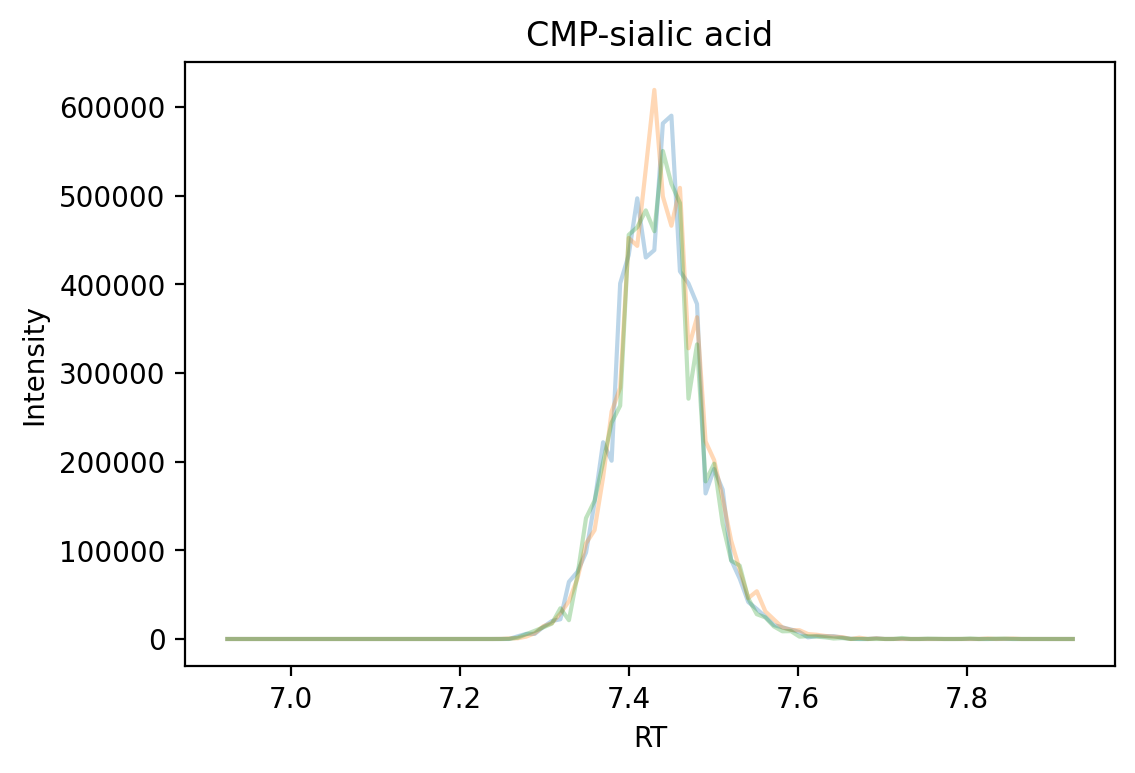

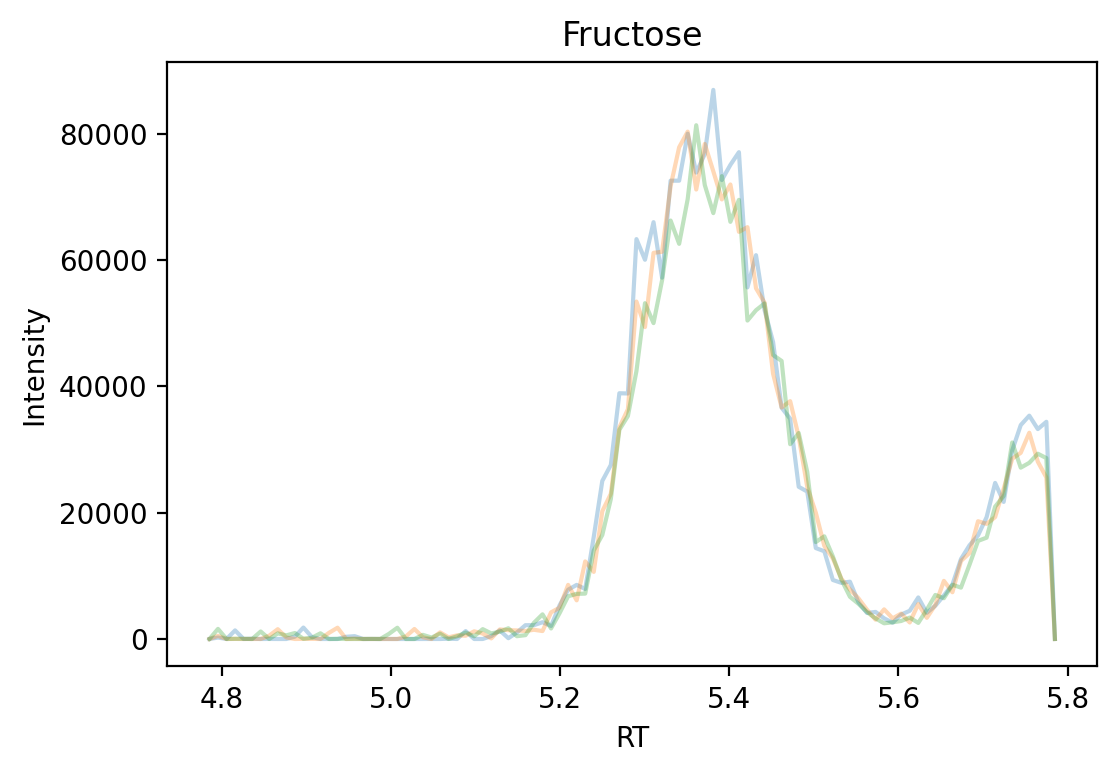

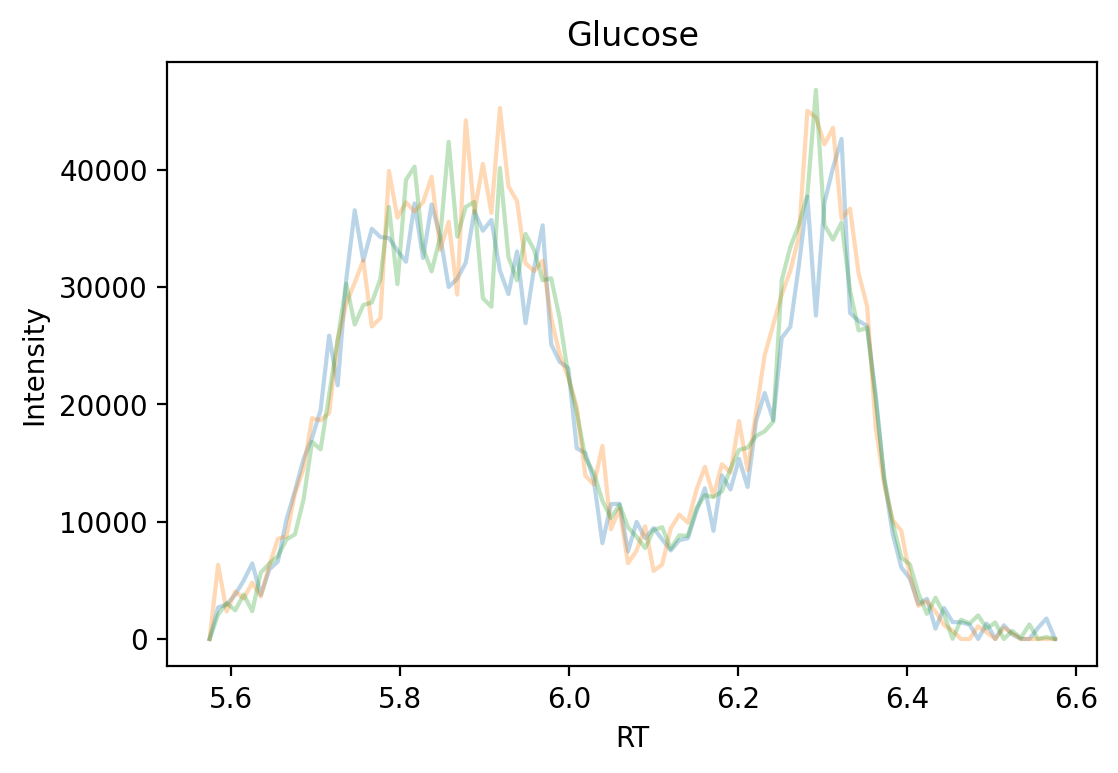

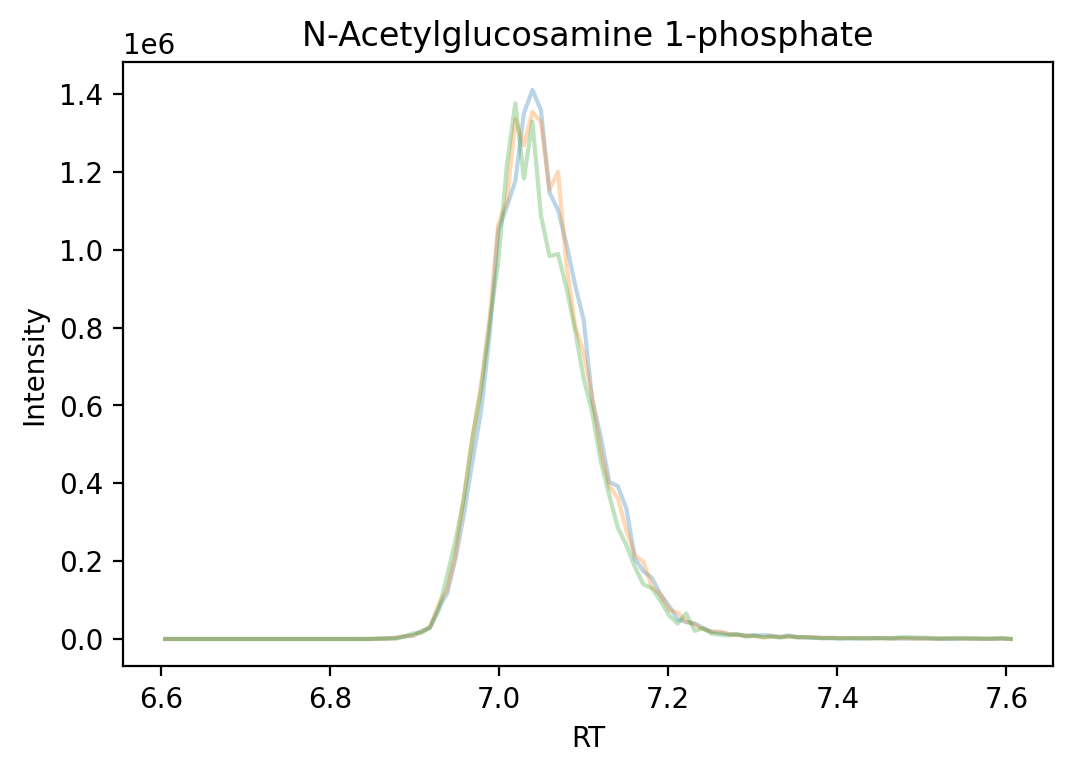

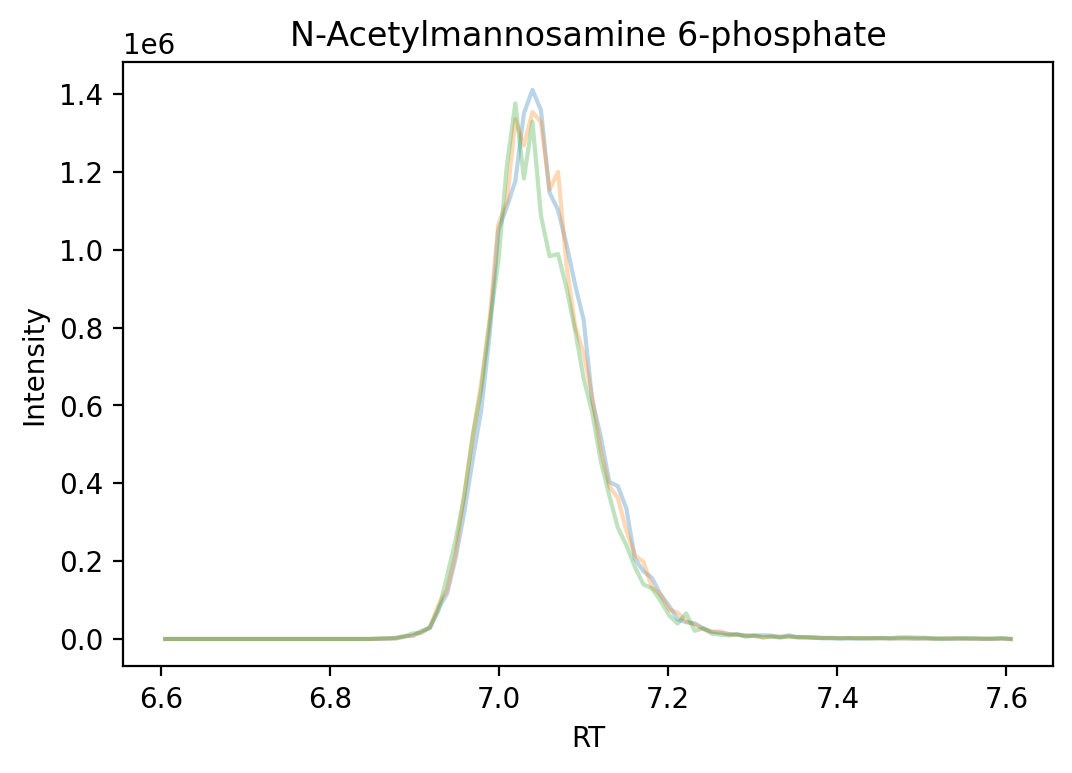

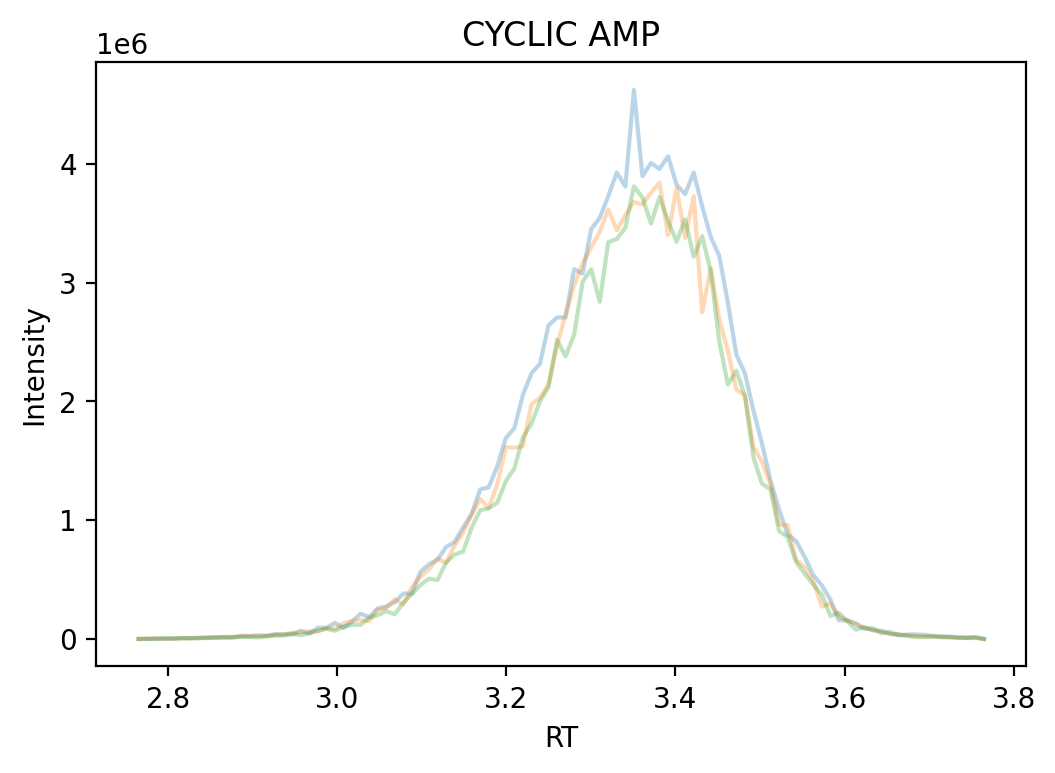

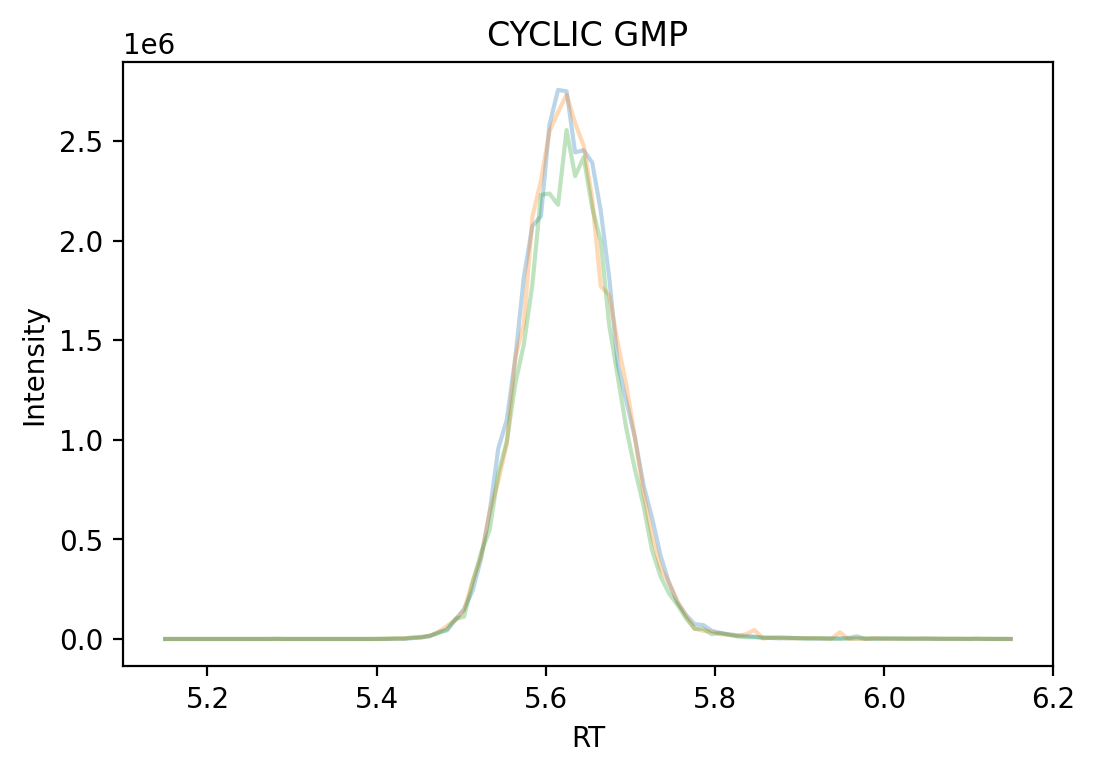

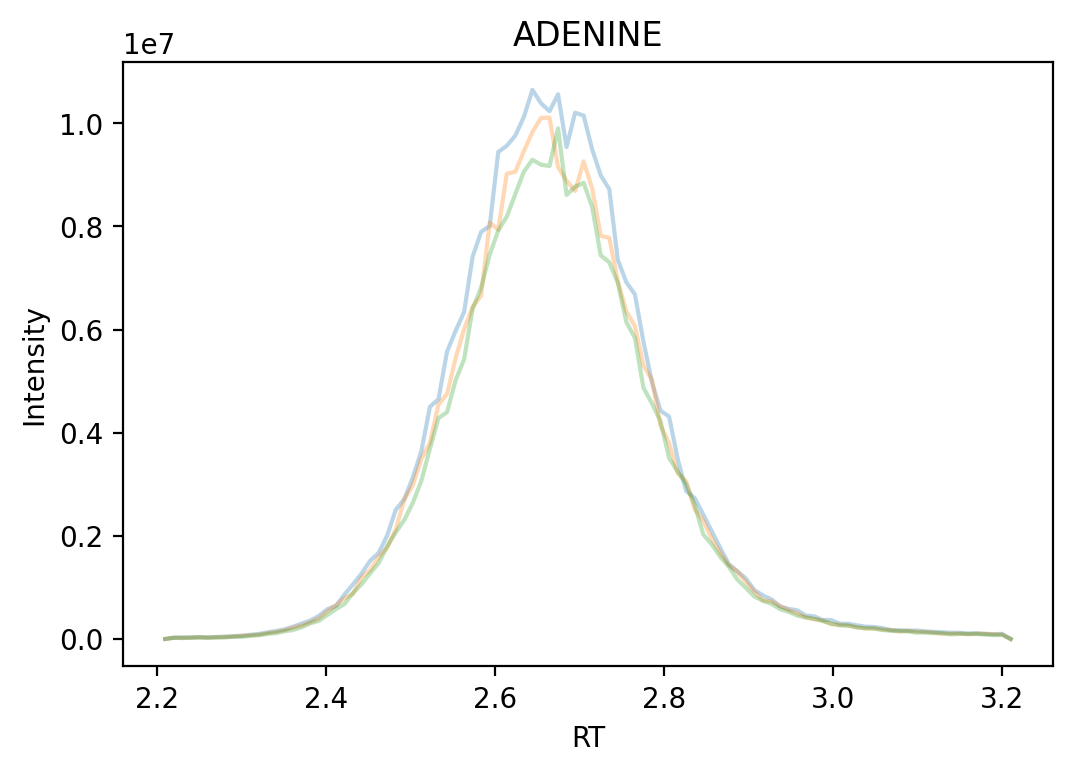

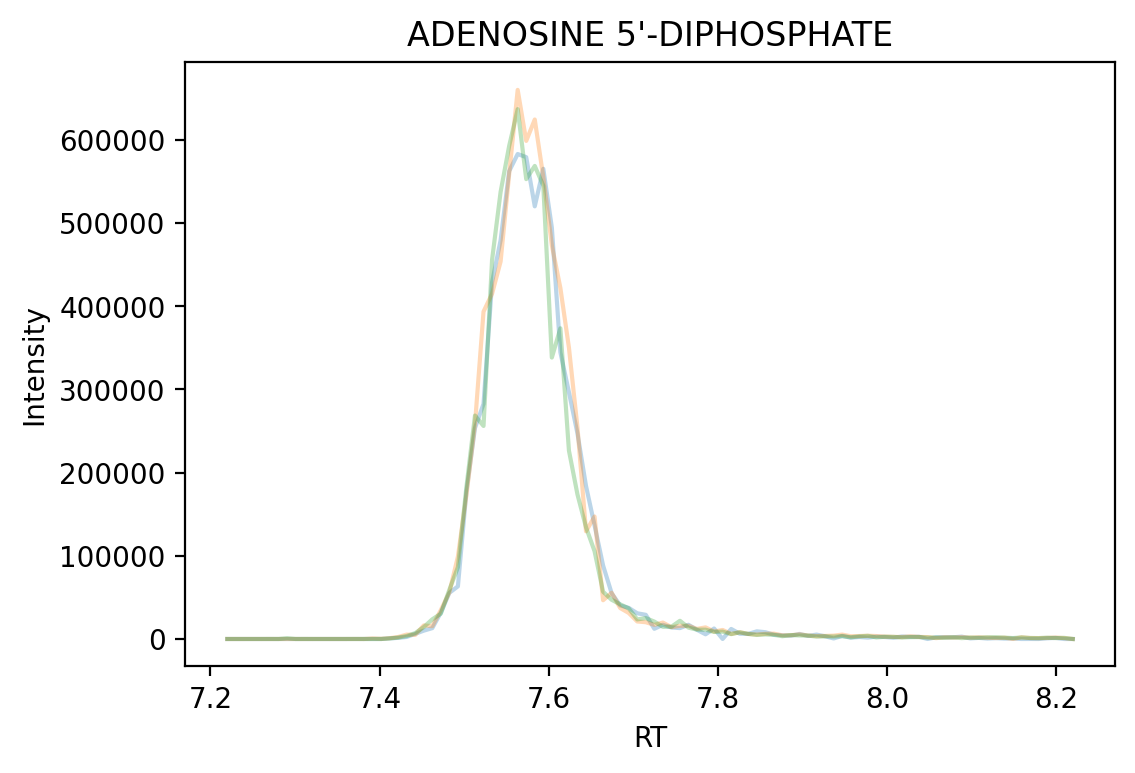

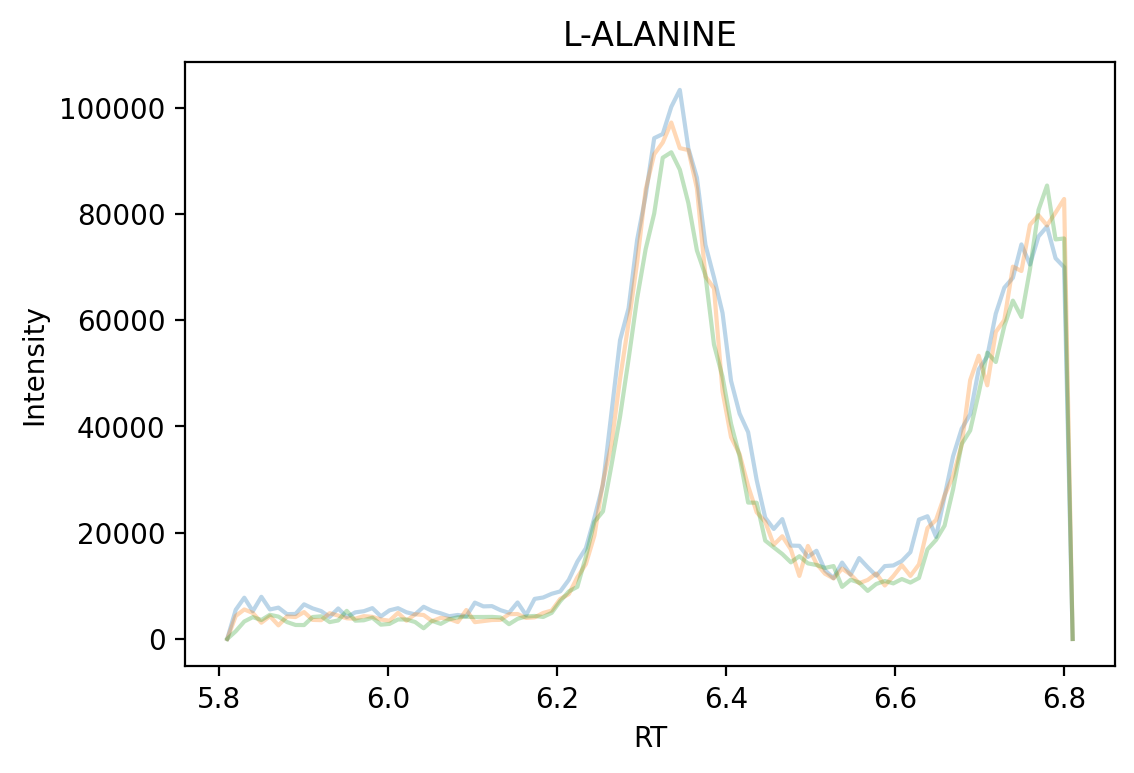

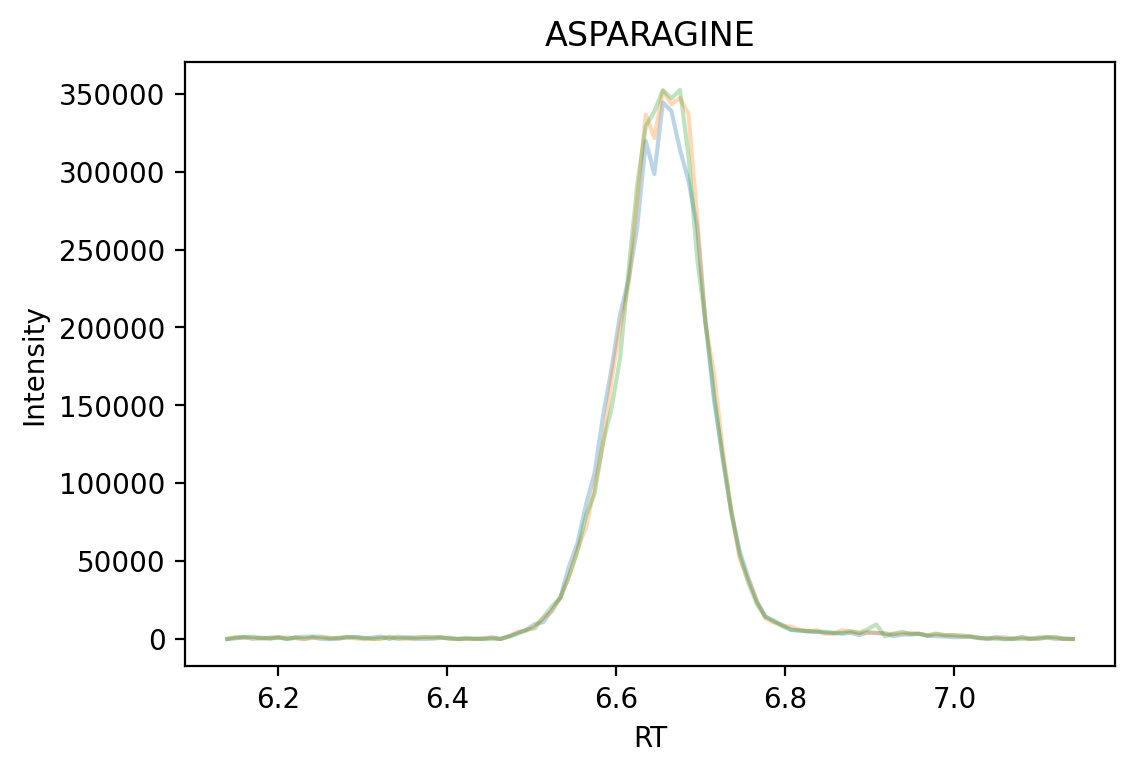

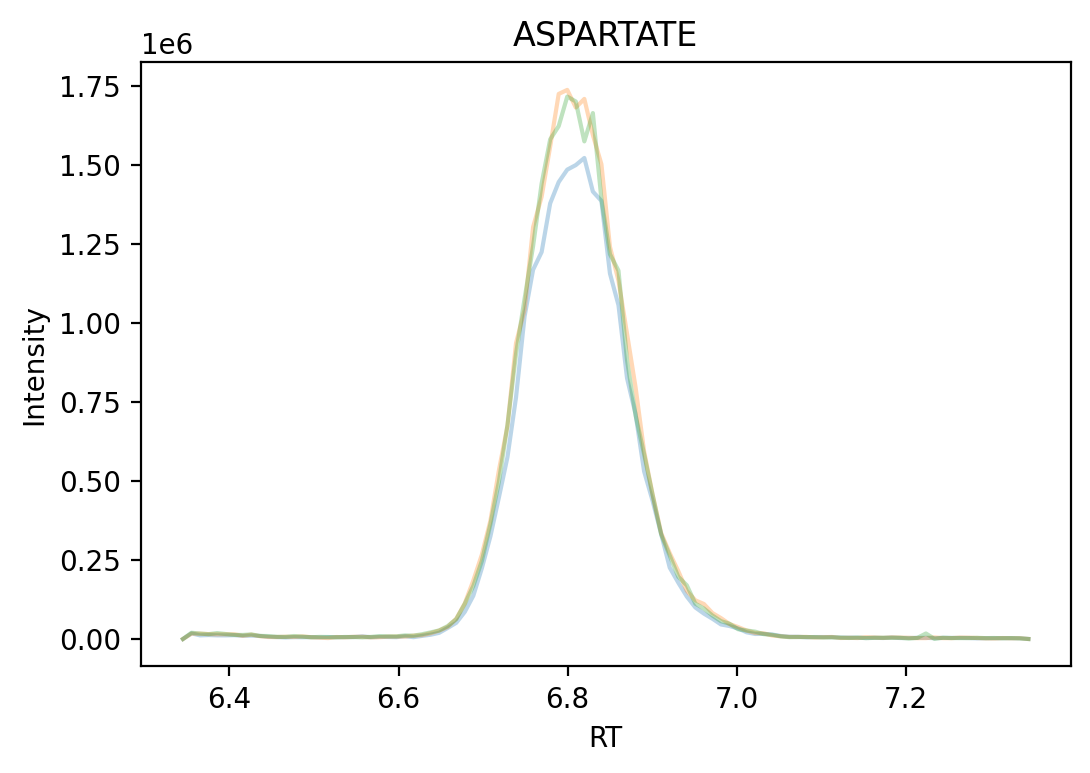

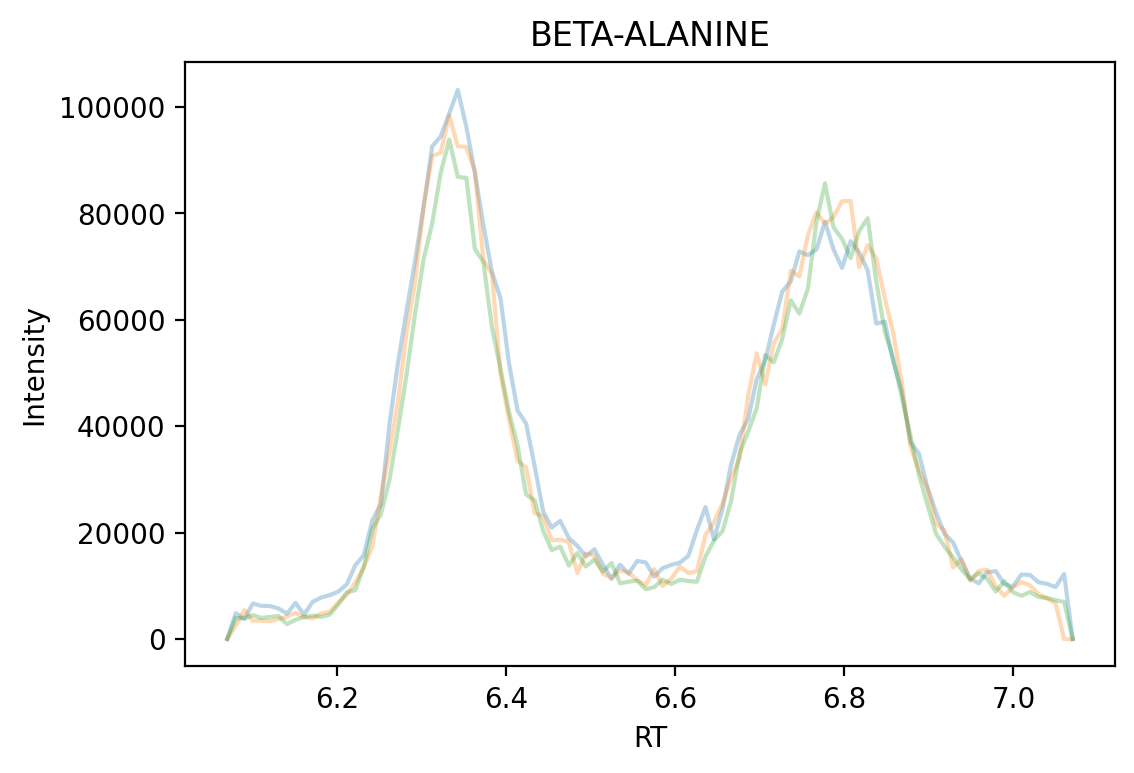

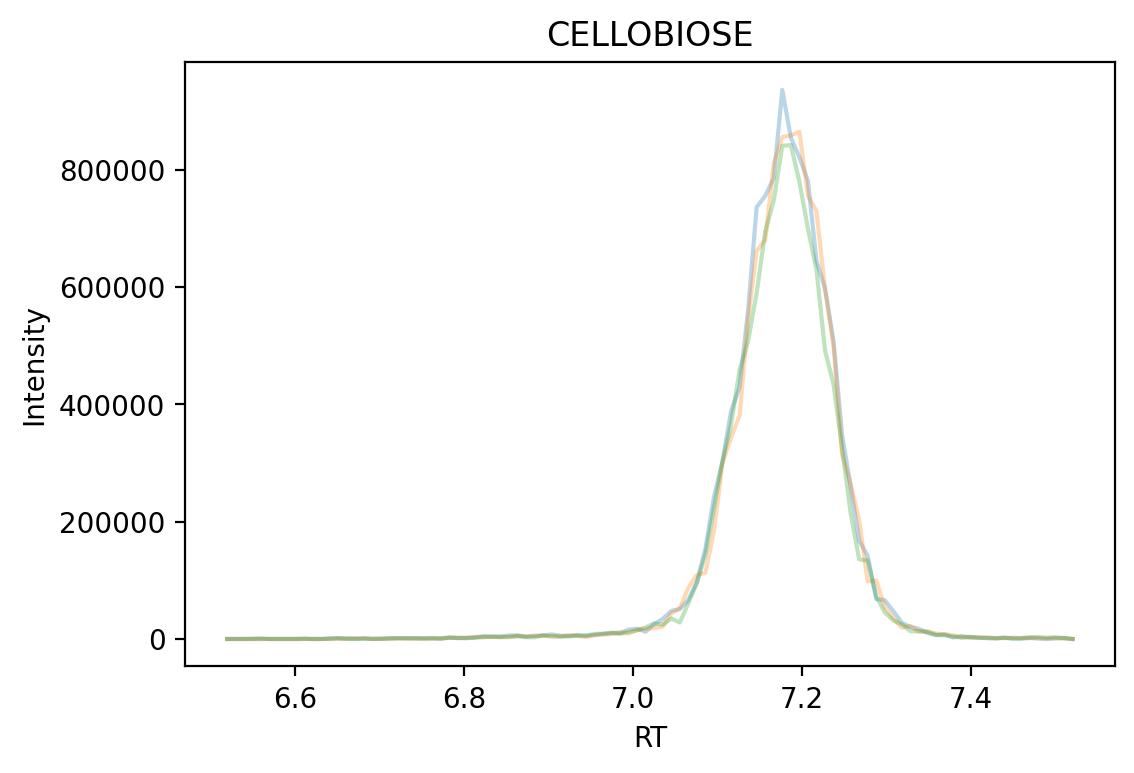

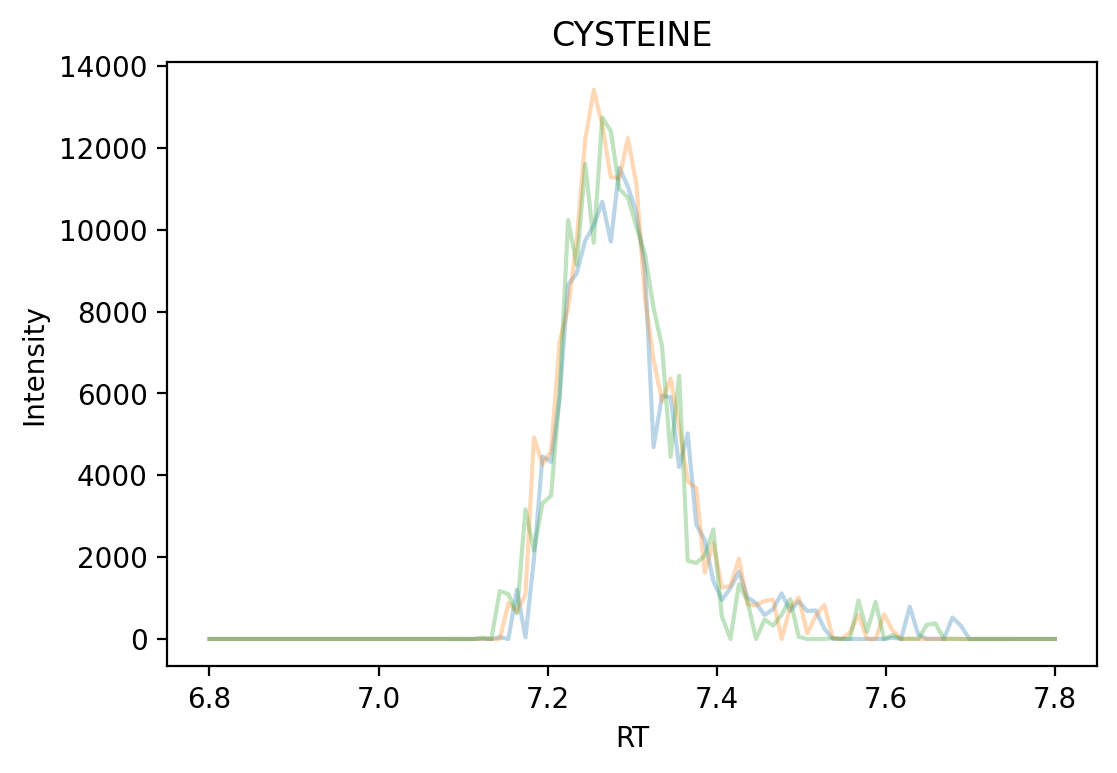

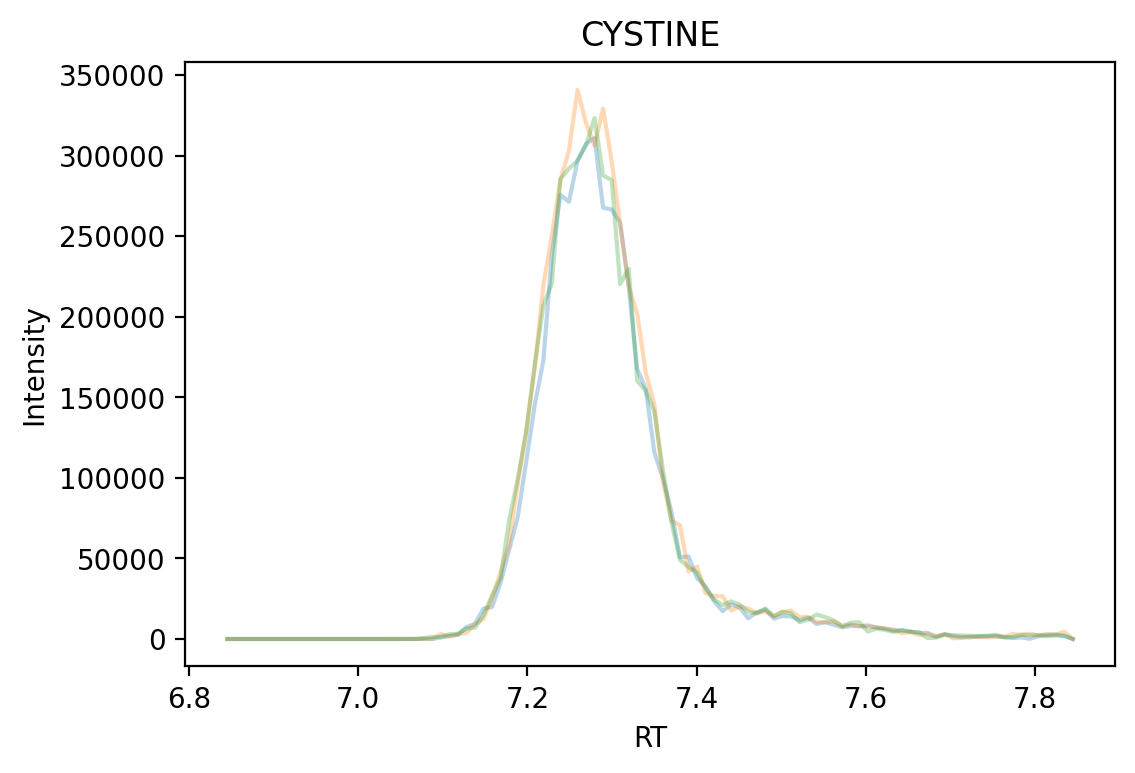

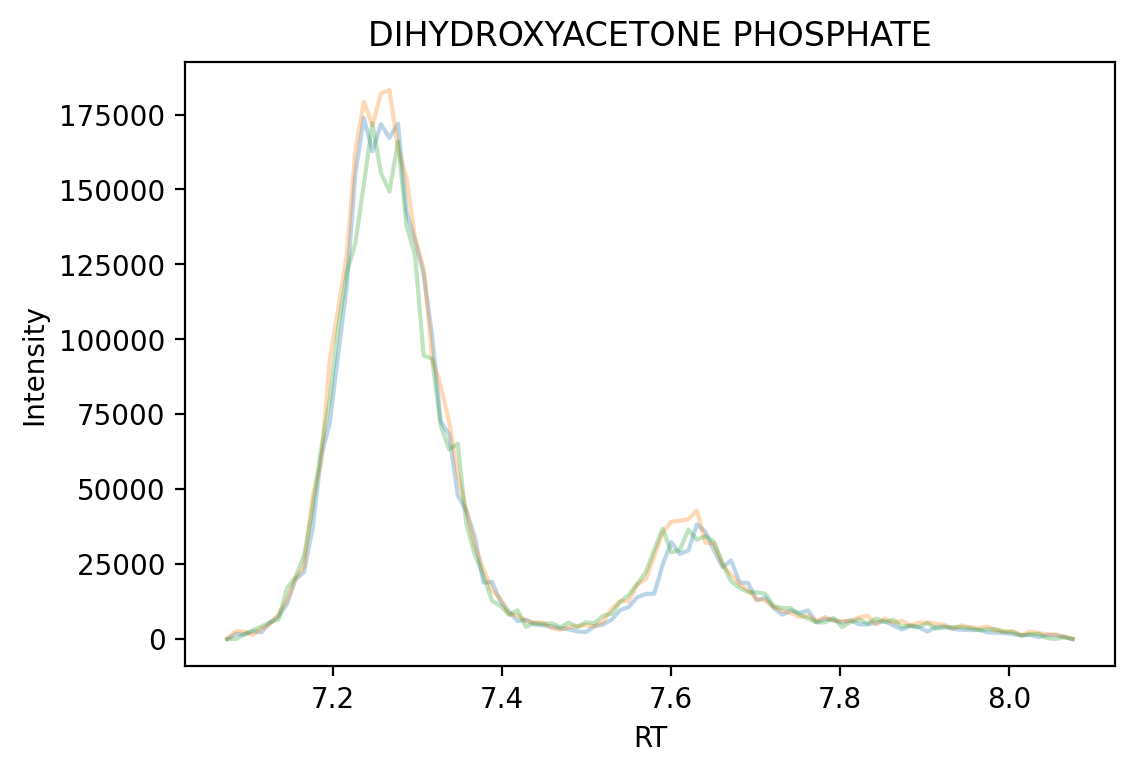

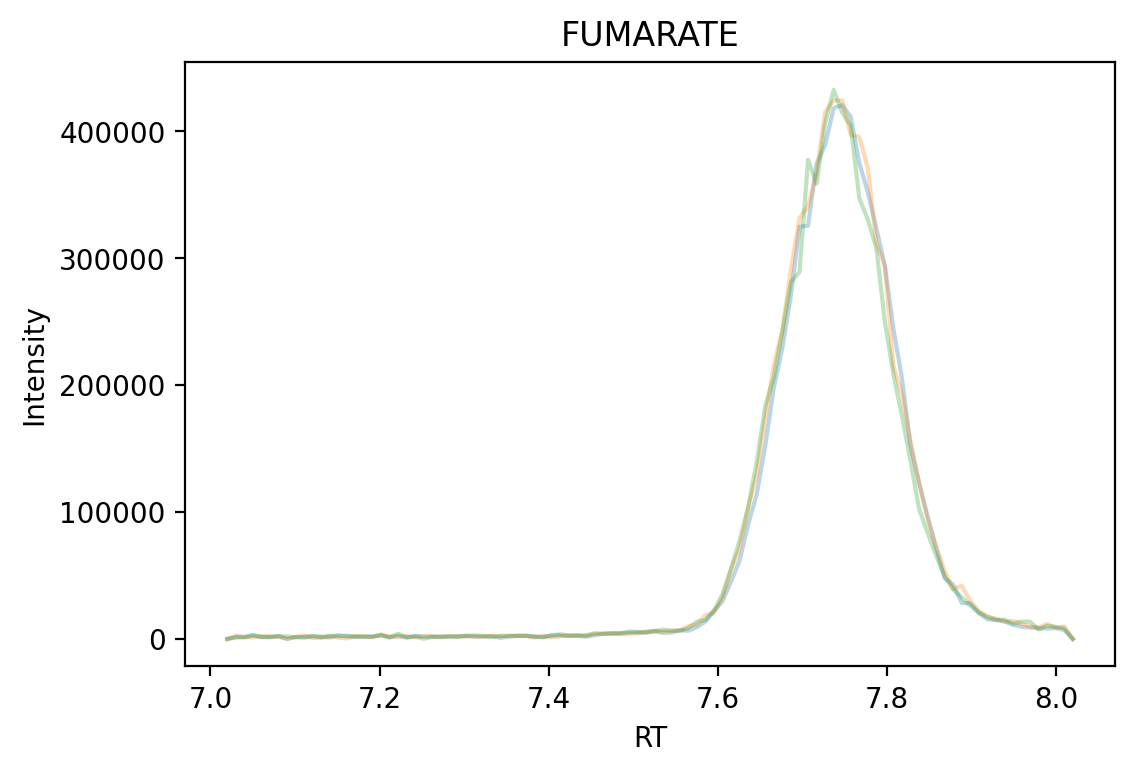

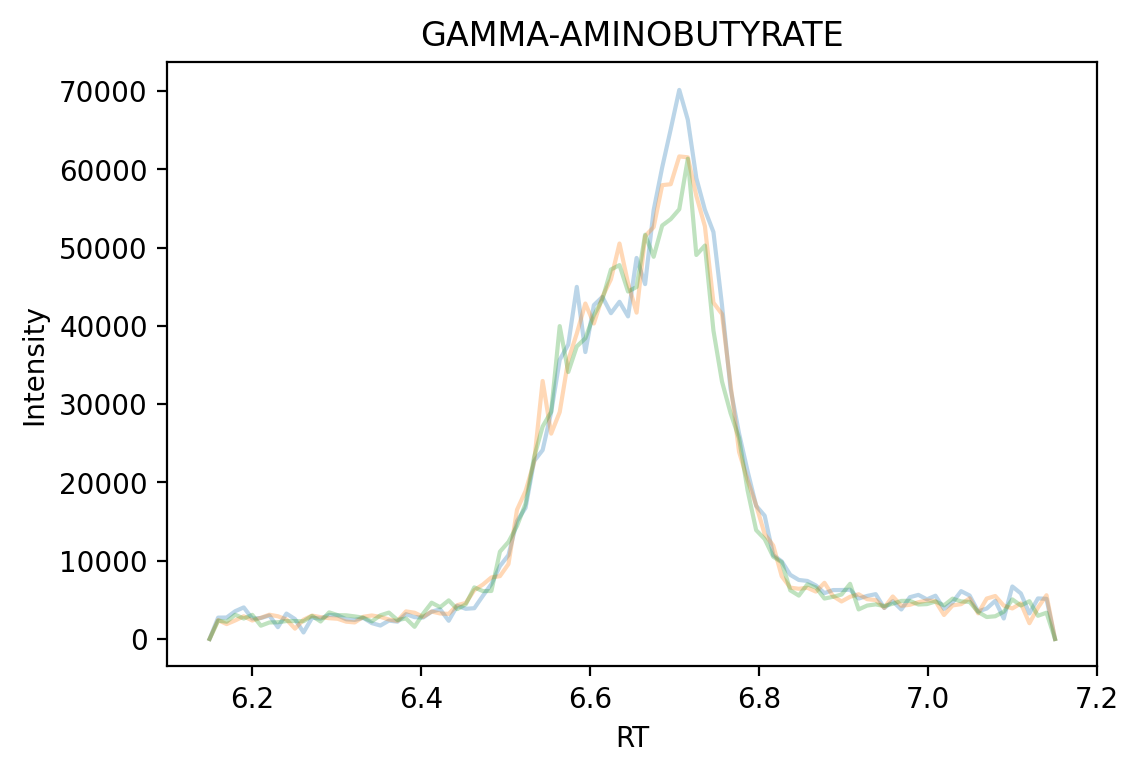

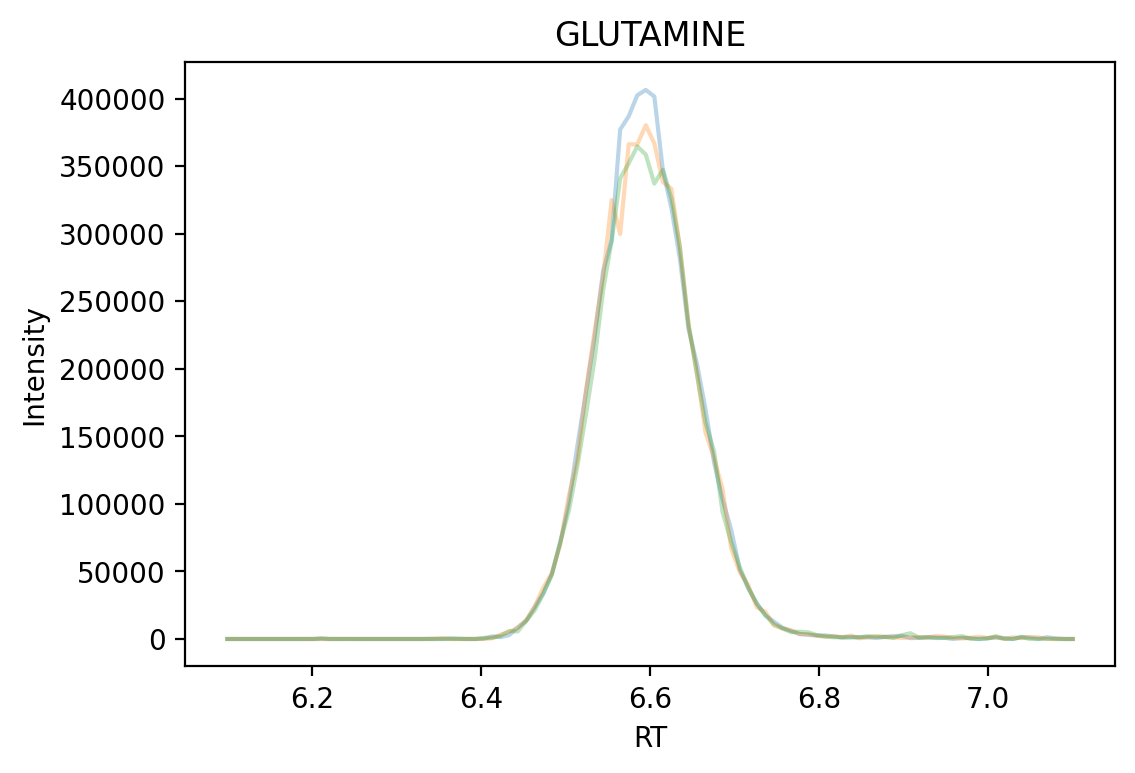

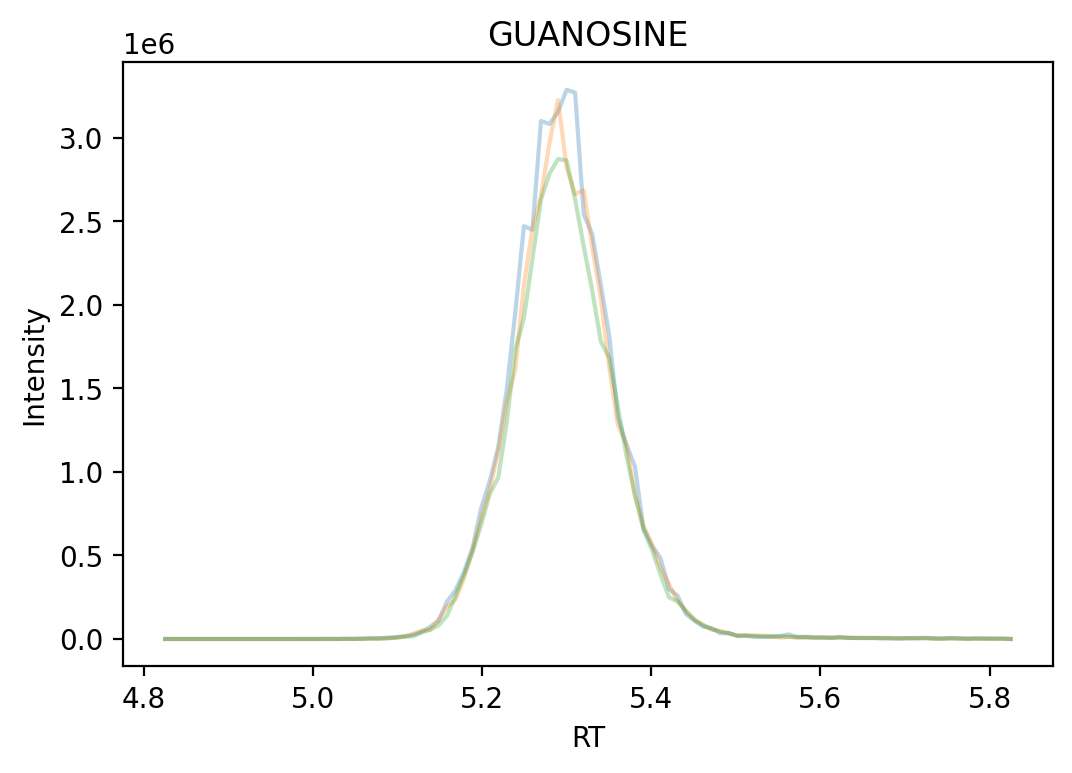

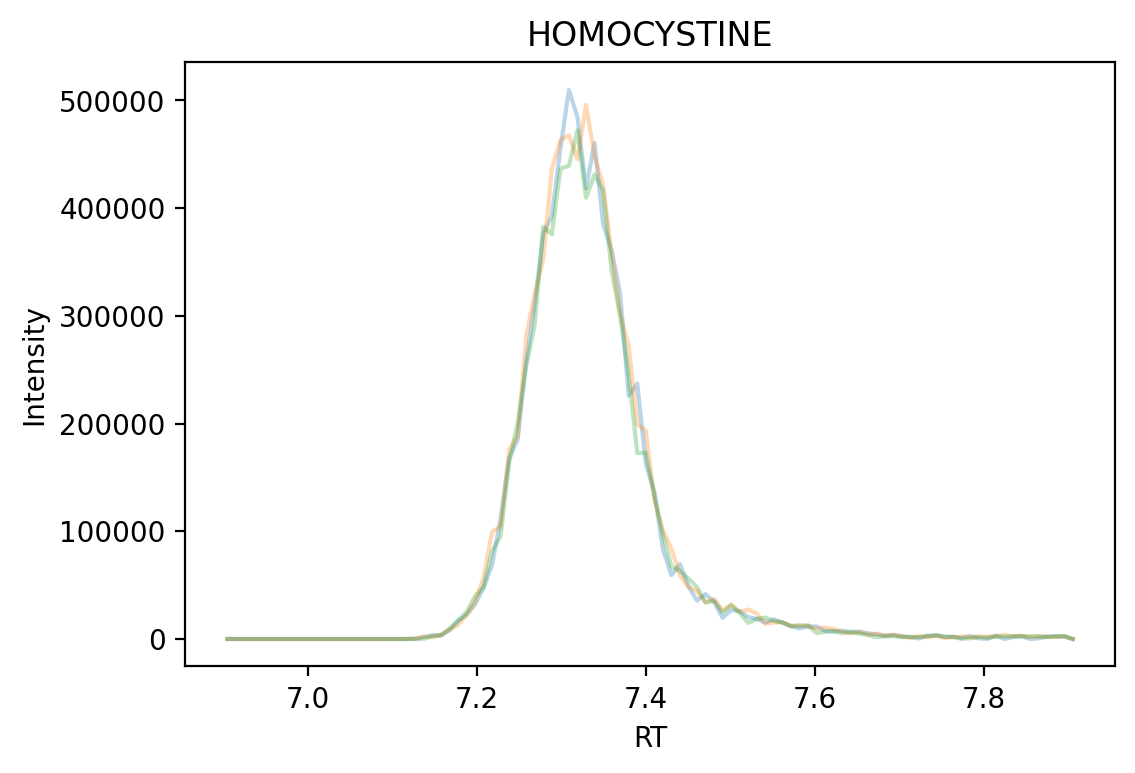

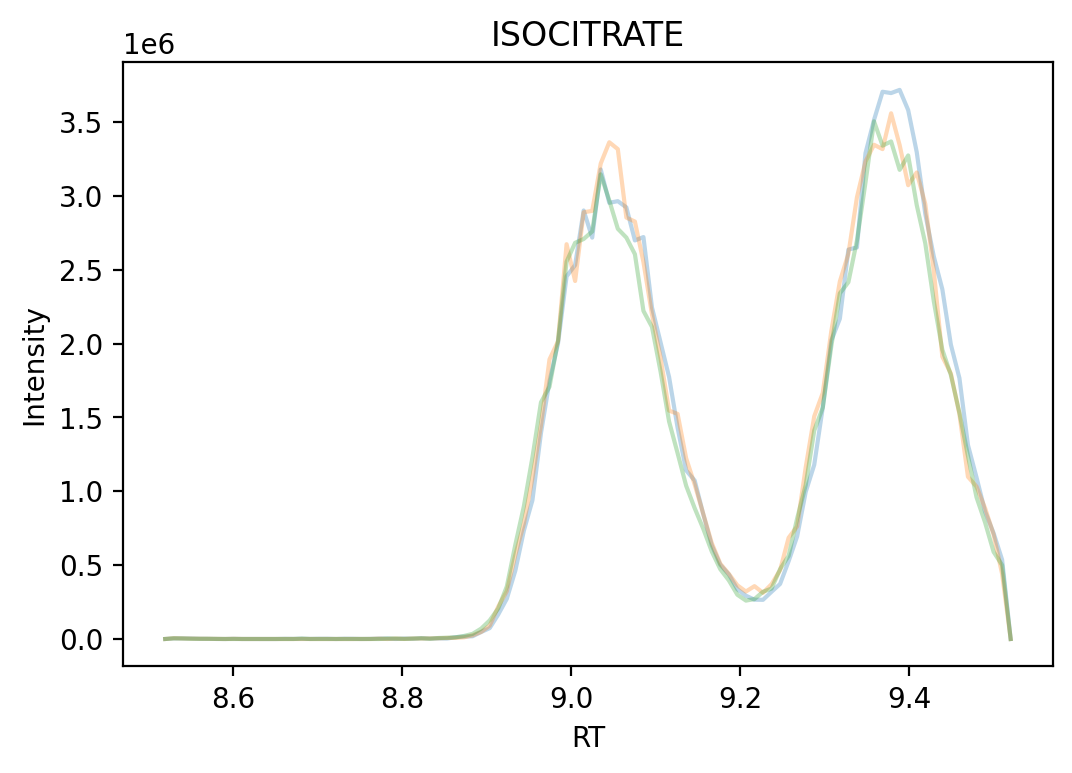

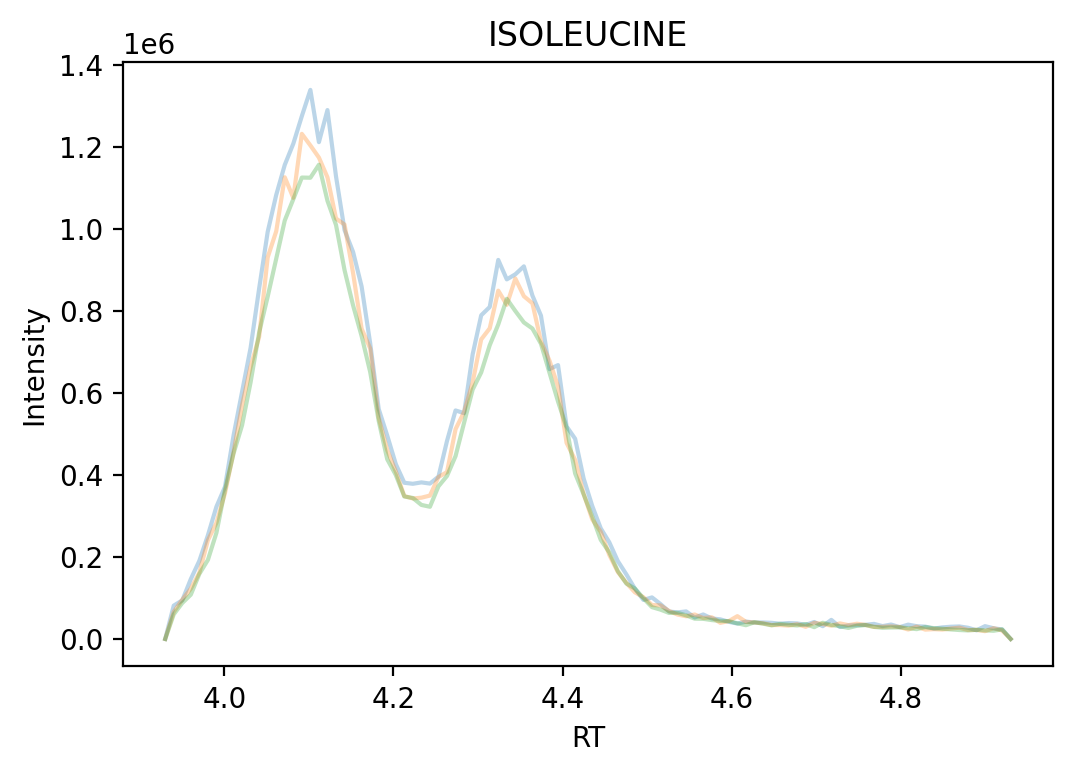

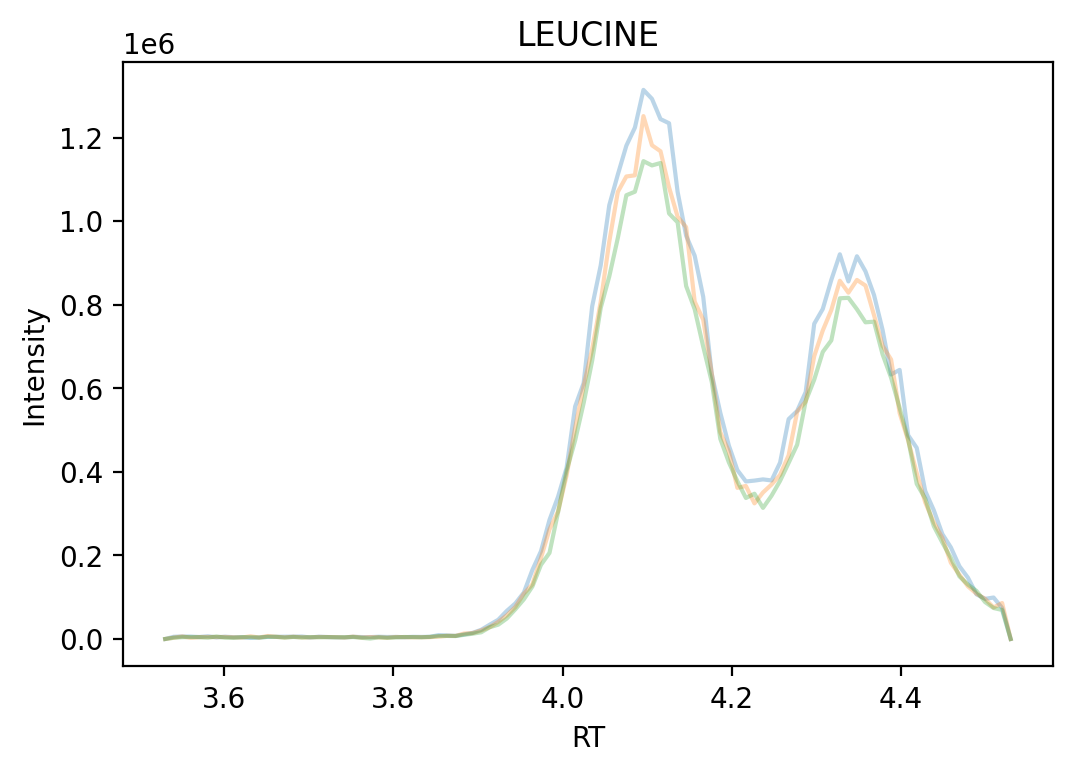

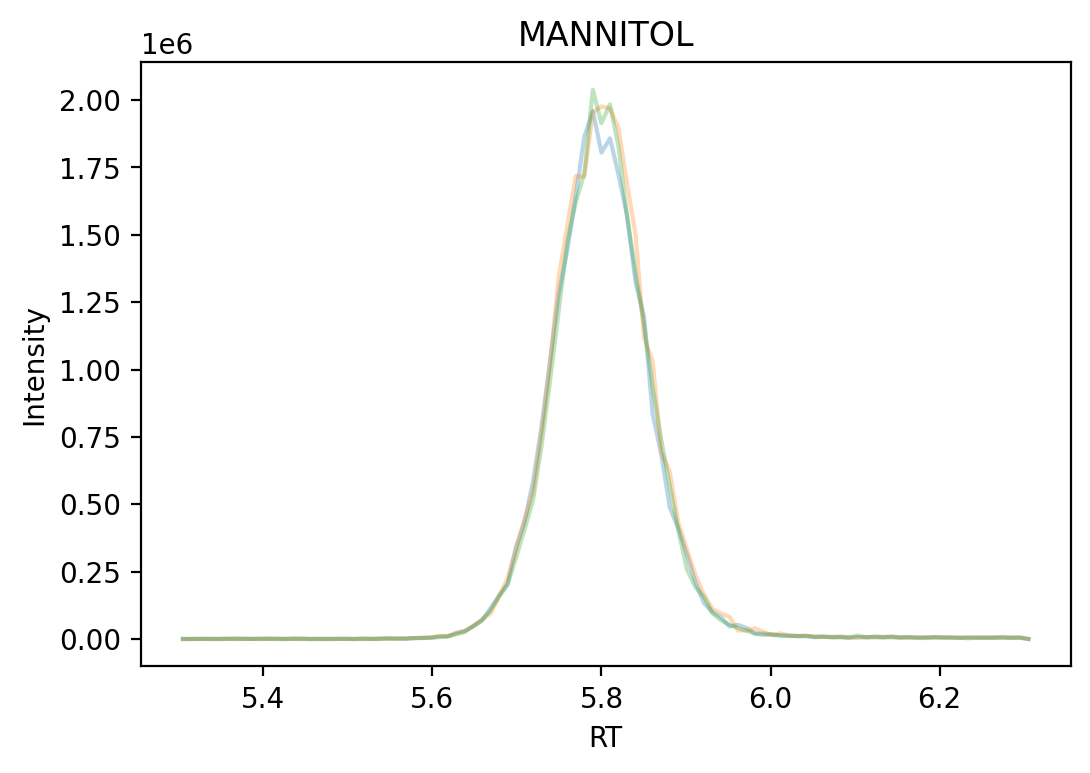

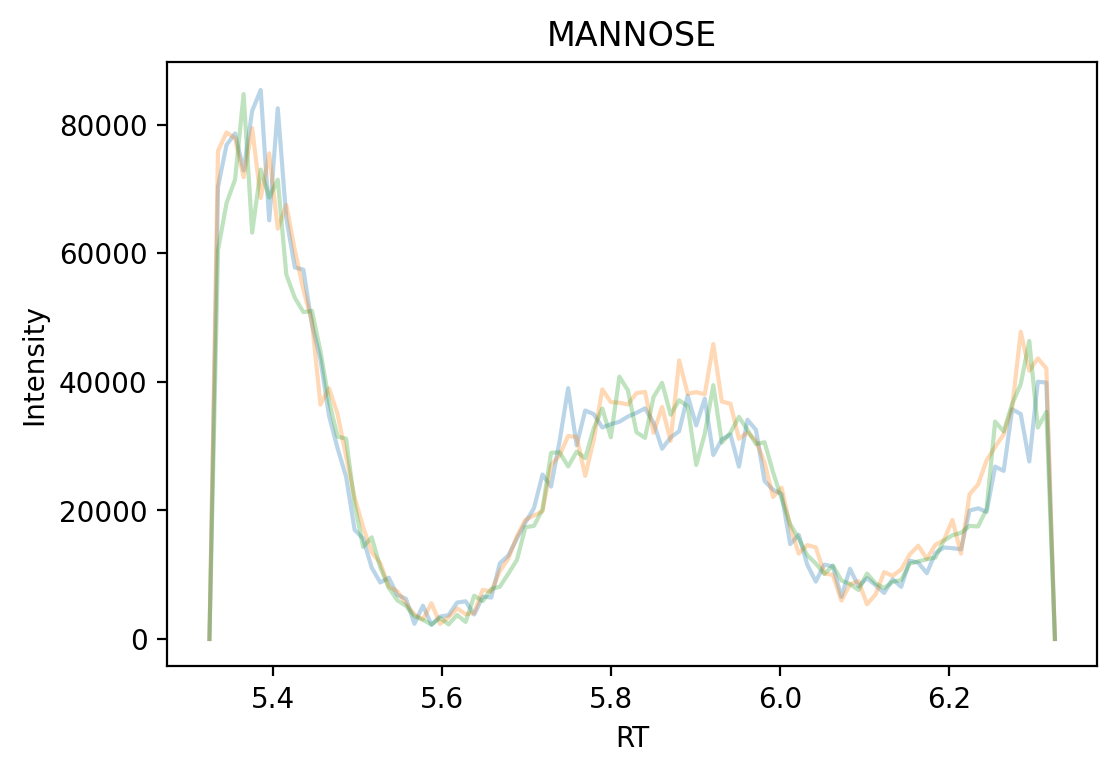

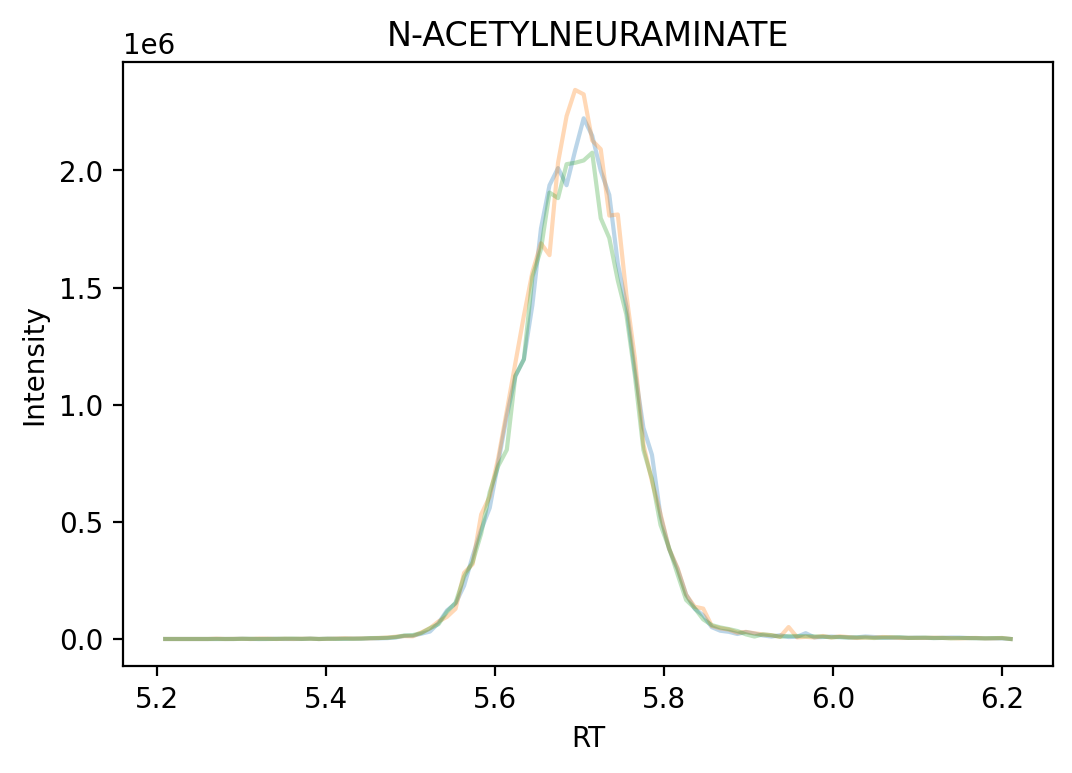

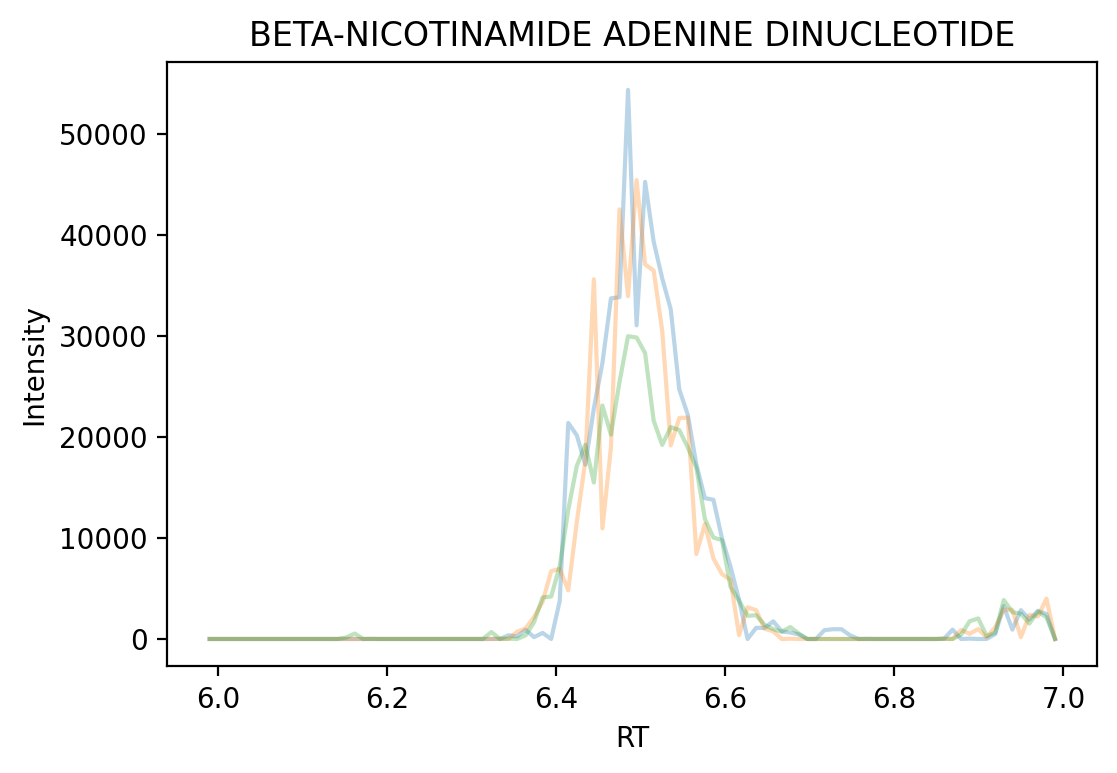

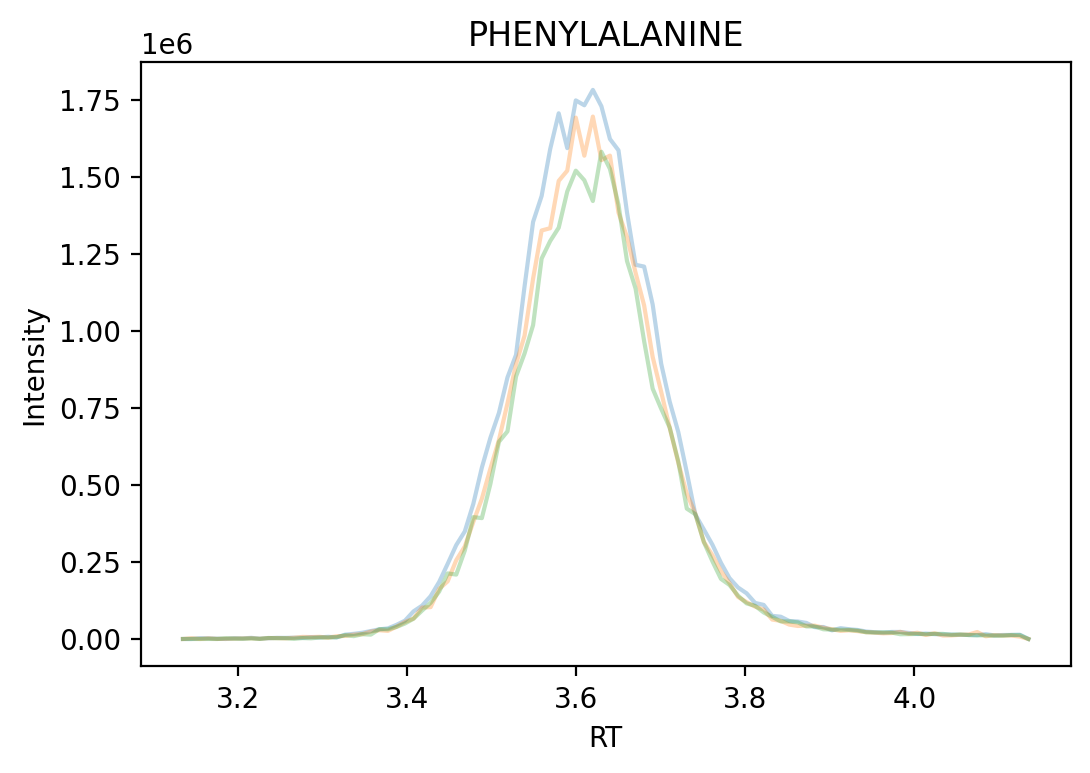

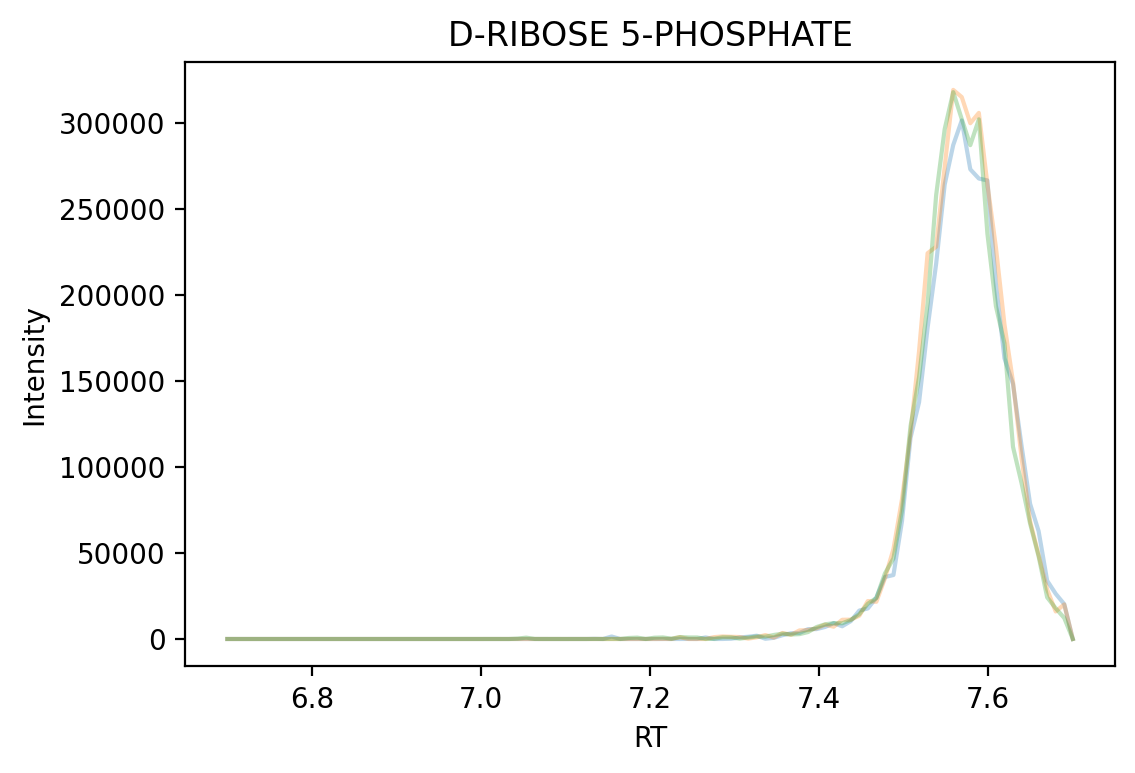

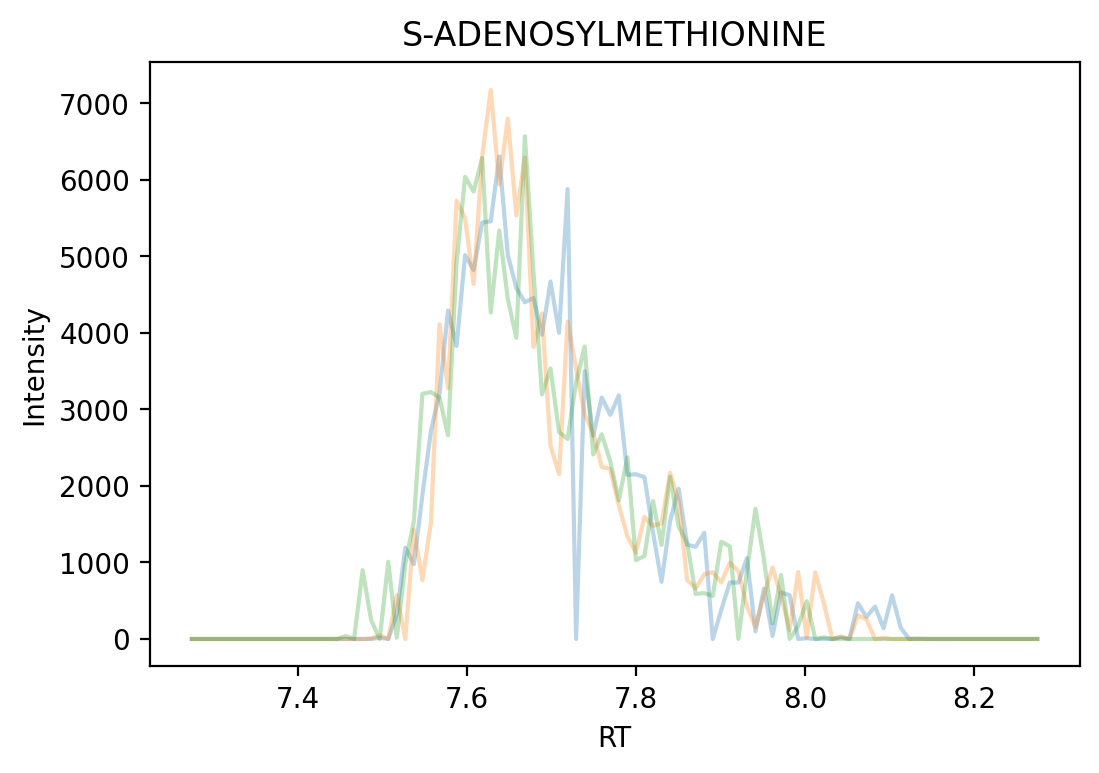

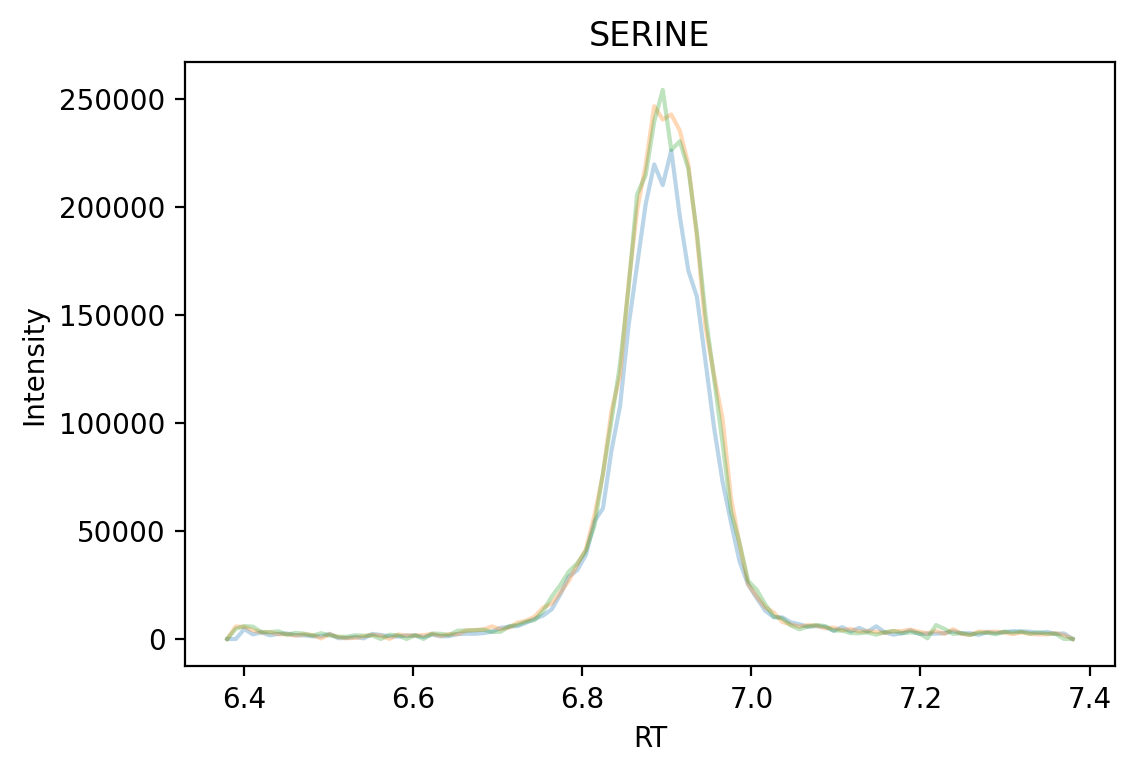

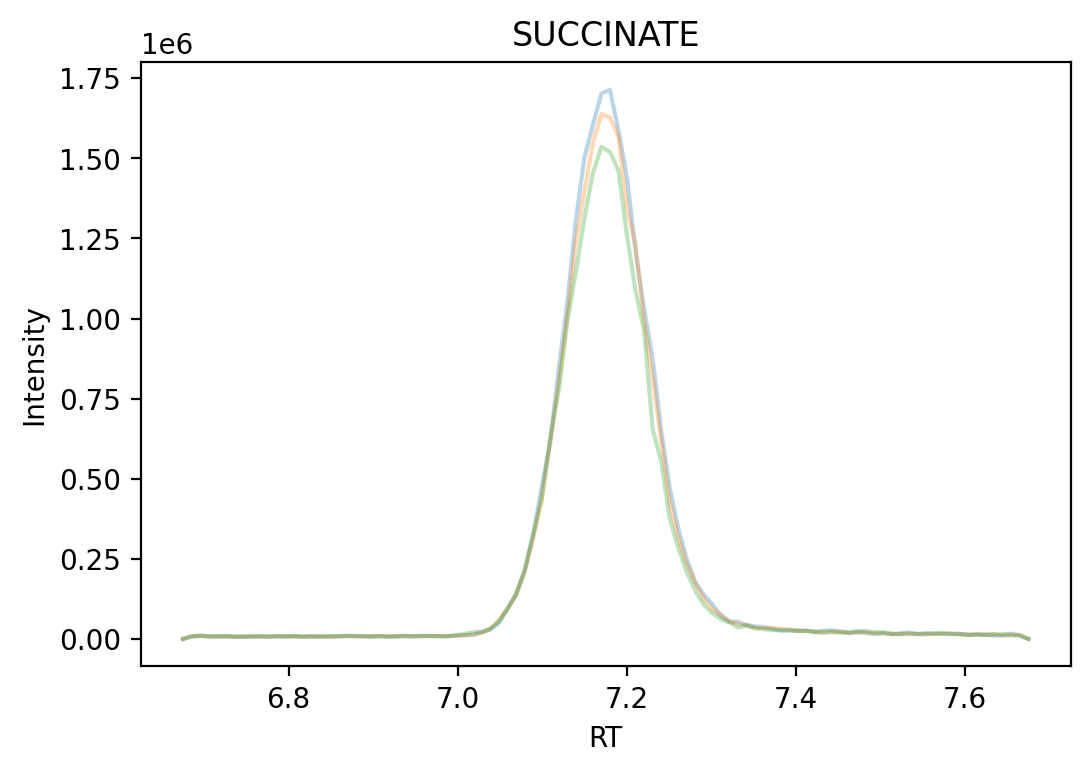

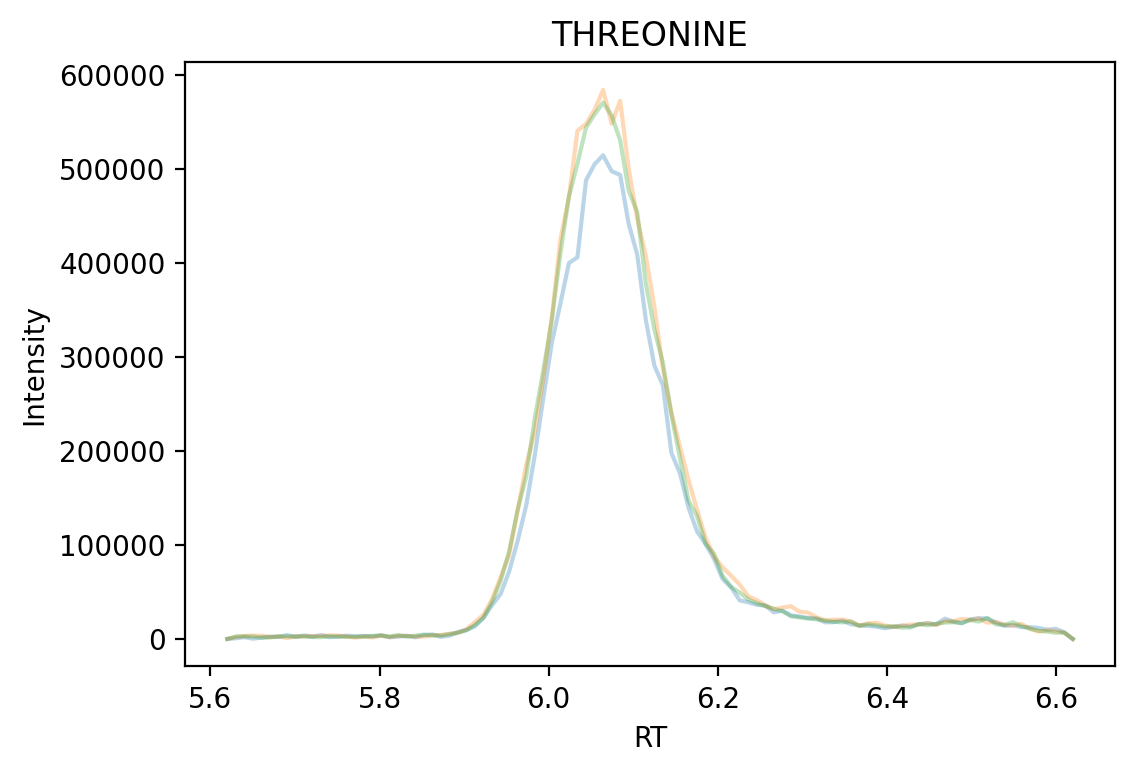

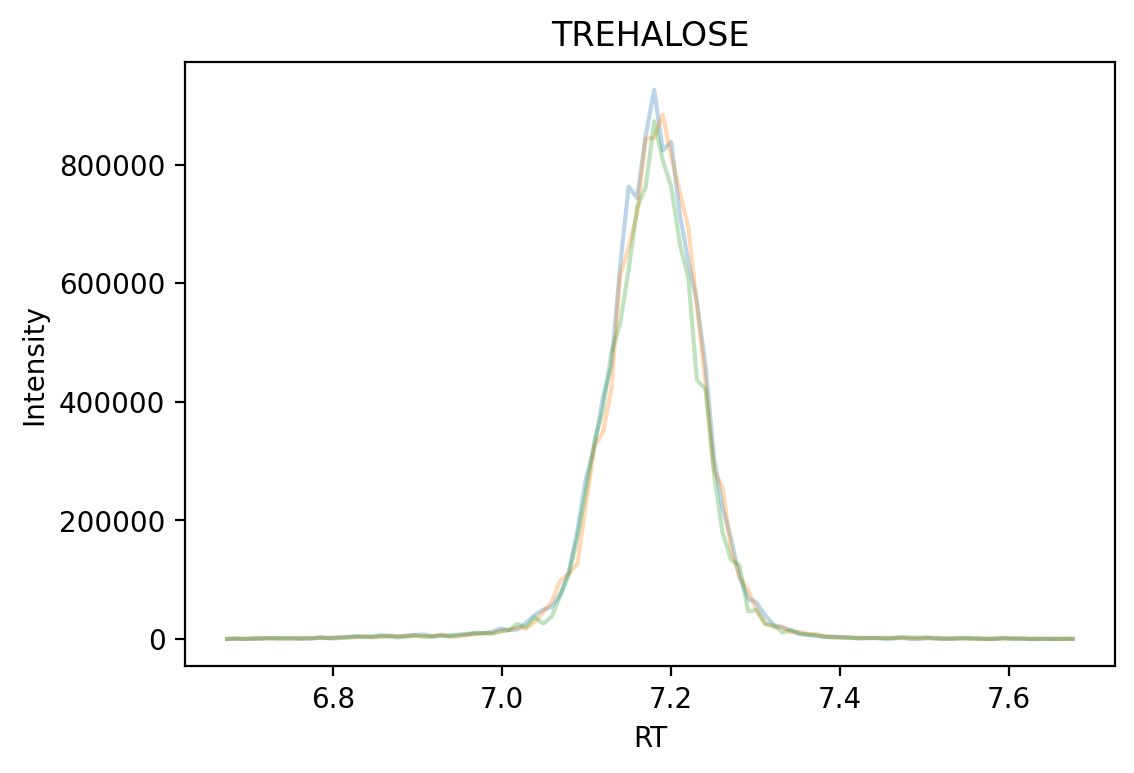

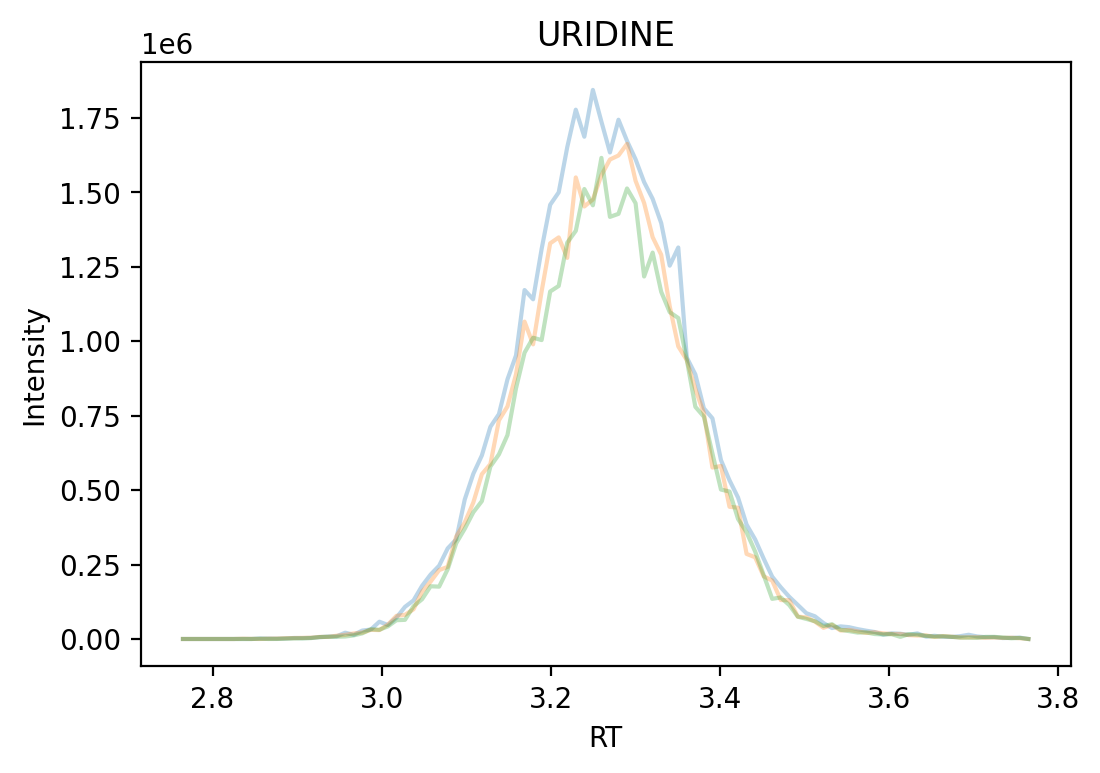

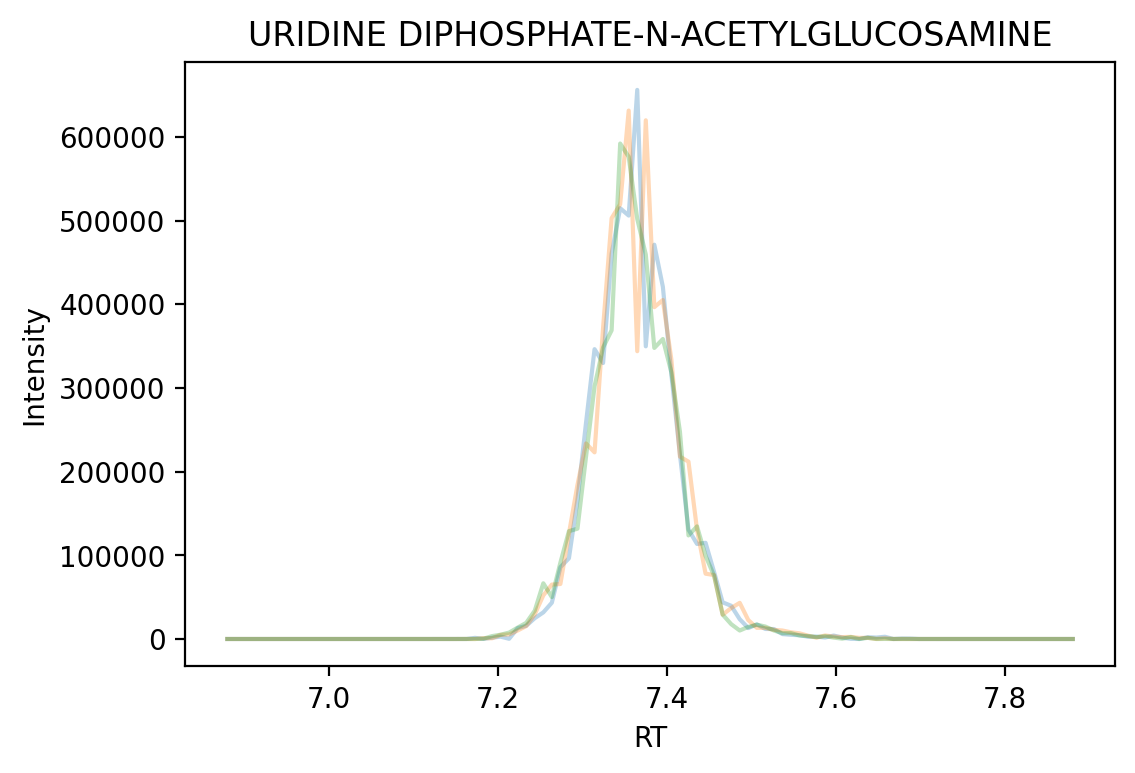

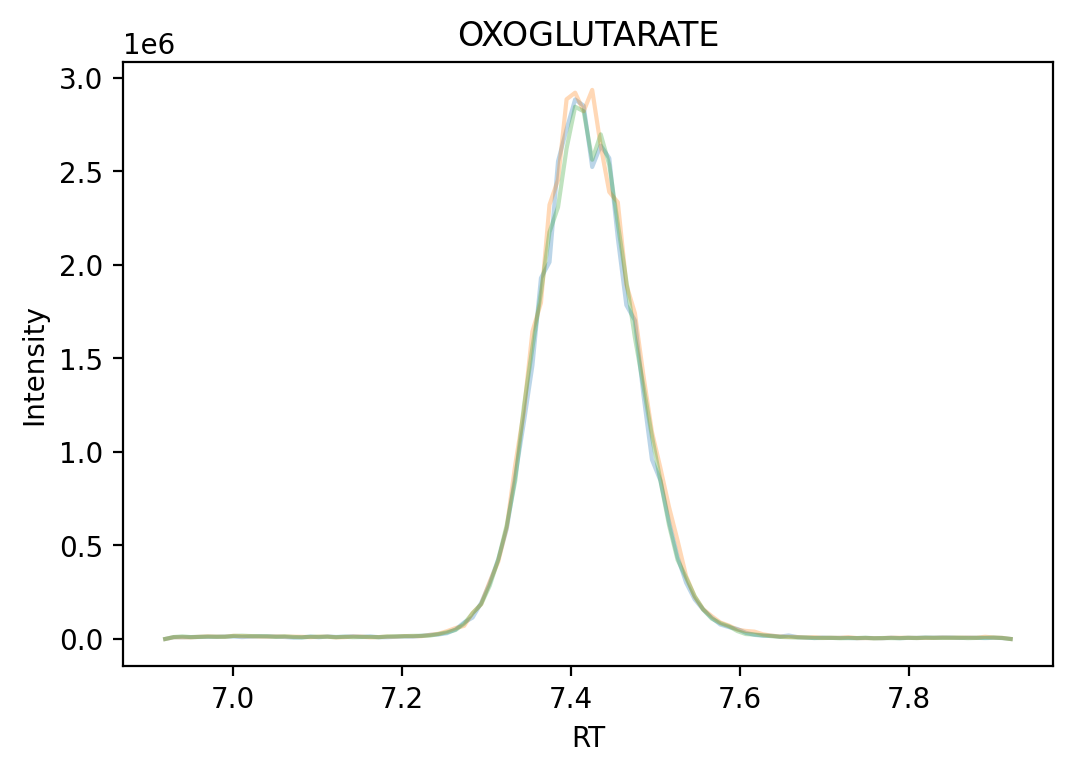

In [28]:
for mz,rt,name in real_peaks:
    if name in corClass["metabolite"].values:
        plt.figure()
        integ.plot_overlayedEIC([raw_data[file] for file in files],mz,rt-.5,rt + .5)
        plt.xlabel("RT")
        plt.ylabel("Intensity")
        plt.title(name)

Text(0, 0.5, '% of mixture metabolites ')

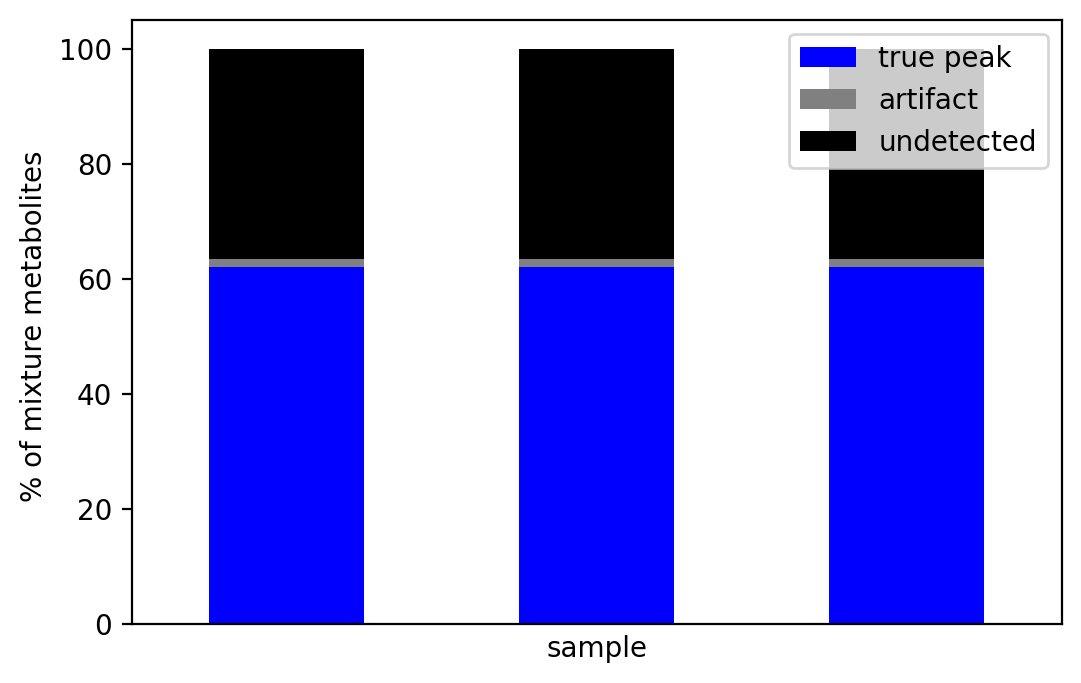

In [29]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["blue","grey","black"])
plt.xticks([],[])
plt.ylabel("% of mixture metabolites ")


In [56]:
if __name__ == "__main__":
    ms1_peaks_recurse = {}
    for file in files:
        rois = integ.roiDetection(raw_data[file],intensityCutuff=1000,numDataPoints=5)
        peaks = integ.detectPeaks(raw_data[file],rois,window=15,cutoff = .99,noiseCutoff=4.0)
        ms1_peaks_recurse[file] = pd.DataFrame(data=np.array(peaks),columns=["mz","rt"])
        

Detecting ROIs |█████████████████████████████████████████████████-| 99.9% 3393 ROIs found
3400  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 


../src\integrAitor.py:400: RuntimeWarning:

divide by zero encountered in log10

../src\integrAitor.py:400: RuntimeWarning:

invalid value encountered in log10



done,  360400  EICs generated
smoothing EICs...
11263/11263 [==============================] - 126s 11ms/step
done
classifying peaks...
11263/11263 [==============================] - 25s 2ms/step
done
5070  peaks found
Detecting ROIs |█████████████████████████████████████████████████-| 99.9% 3235 ROIs found
3240  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done,  343440  EICs generated
smoothing EICs...
10733/10733 [==============================] - 115s 11ms/step
done
classifying peaks...
10733/10733 [==============================] - 21s 2ms/step
done
4879  peaks found
Detecting ROIs |█████████████████████████████████████████████████-| 99.9% 3217 ROIs found
3225  ROIs found
generating all EICs from ROIs...
forming matrix |██████████████████████████████████████████████████| 100.0% 
done,  341850  EICs generated
smoothing EICs...
10683/10683 [==============================] - 116s 11ms/step
done
classifying pea

In [57]:
plt_dict = {}
ppmTol = 10
rtTol = .5
for file in files: 
    for mz,rt,name in real_peaks:
        delta = ppmTol * mz / 1e6
        maxMz = mz + delta
        minMz = mz - delta
        found = False
        for index,row in ms1_peaks_recurse[file].iterrows():
            if row["mz"] > minMz and row["mz"] < maxMz:
                if abs(rt-row["rt"]) < rtTol:
                    numDetected += 1
                    found = True
                    plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"true peak","sample" : file}
                    break
        if not found:
            plt_dict[len(plt_dict)] = {"metabolite":name,"classification":"undetected","sample" : file}
   
df = pd.DataFrame.from_dict(plt_dict,orient="index")

Text(0, 0.5, '% of mixture metabolites ')

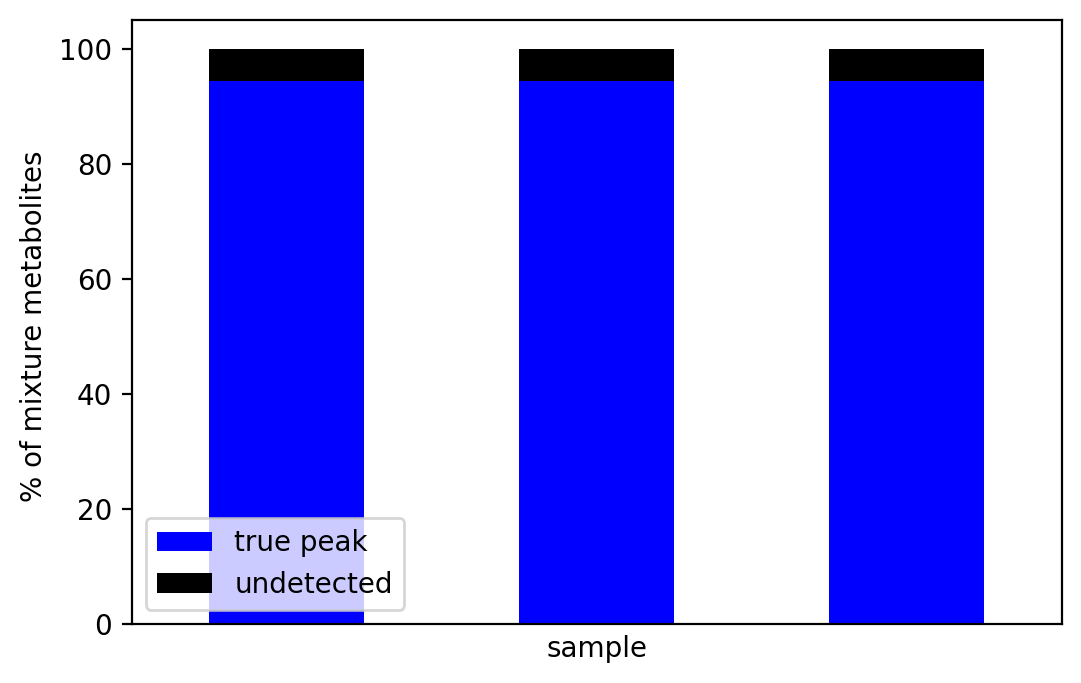

In [58]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ 100*len(df[(df[rows]==value) & (df[columns]==key)]) / len(df[df[rows]==value]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('sample','classification',df).plot(kind='bar',stacked=True,color=["blue","black"])
plt.xticks([],[])
plt.ylabel("% of mixture metabolites ")


In [59]:
ms1_peaks_recurse[file]

mz        rt
0      71.014143  1.805607
1      71.014143  5.405607
2      71.014143  7.655607
3      71.014143  7.805607
4      72.009438  3.605607
...          ...       ...
4964  875.211990  6.455607
4965  878.806918  9.005607
4966  885.119860  8.255607
4967  885.119860  8.405607
4968  886.217280  5.705607

[4969 rows x 2 columns]

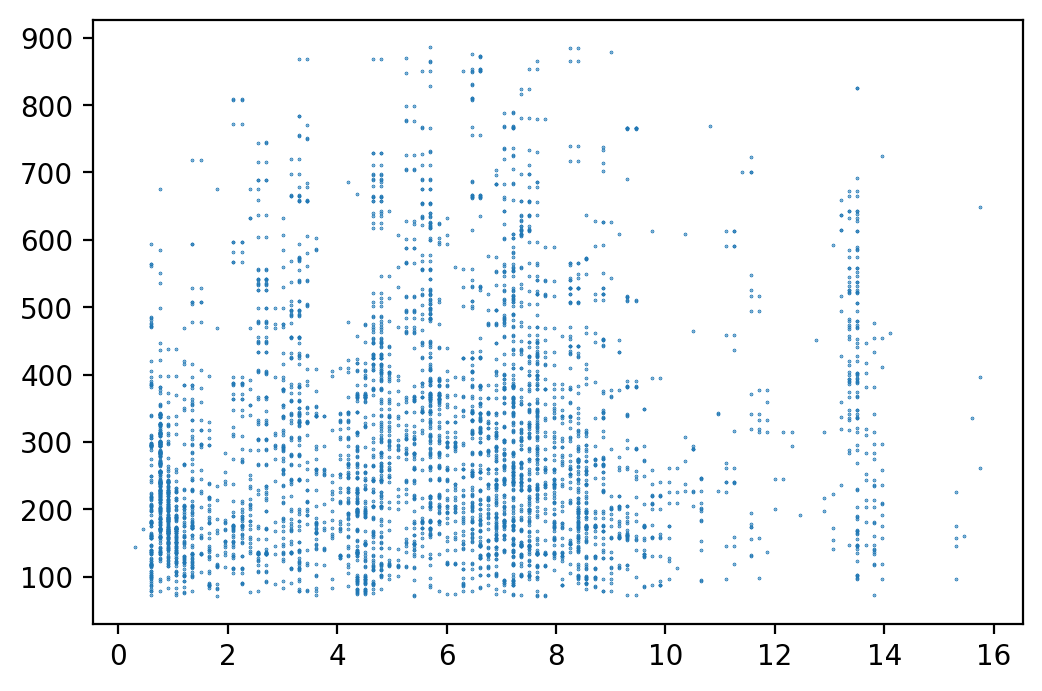

In [60]:
plt.scatter(ms1_peaks_recurse[file]["rt"],ms1_peaks_recurse[file]["mz"],s=.1)

In [61]:
transitionList = pd.DataFrame(ms1_peaks_recurse[file])
polarity = "Negative"
moleculeListName = file + " peaks"
transitionList["Precursor Name"] = ["unknown " + str(index) for index, row in transitionList.iterrows()]
transitionList["Explicit Retention Time"] = [row["rt"] for index, row in
                                             transitionList.iterrows()]
polMapper = {"Positive": 1, "Negative": -1}
transitionList["Precursor Charge"] = [polMapper[polarity] for index, row in transitionList.iterrows()]
transitionList["Precursor m/z"] = [row["mz"] for index,row in transitionList.iterrows()]
transitionList["Molecule List Name"] = [moleculeListName for _ in range(len(transitionList))]
transitionList = transitionList[
    ["Molecule List Name", "Precursor Name", "Precursor m/z", "Precursor Charge",
     "Explicit Retention Time"]]
transitionList.to_csv(datadir + "recursive_peaks_transition_list.csv",index= False)

In [62]:
df[df["classification"] == "undetected"]

metabolite classification                    sample
1    Citric acid     undetected  M3T-Std_neg_DDA_1mz.mzML
8        Glucose     undetected  M3T-Std_neg_DDA_1mz.mzML
39     HISTIDINE     undetected  M3T-Std_neg_DDA_1mz.mzML
42    ISOCITRATE     undetected  M3T-Std_neg_DDA_1mz.mzML
72   Citric acid     undetected  M3T-Std_neg_DDA_3mz.mzML
79       Glucose     undetected  M3T-Std_neg_DDA_3mz.mzML
110    HISTIDINE     undetected  M3T-Std_neg_DDA_3mz.mzML
113   ISOCITRATE     undetected  M3T-Std_neg_DDA_3mz.mzML
143  Citric acid     undetected  M3T-Std_neg_DDA_5mz.mzML
150      Glucose     undetected  M3T-Std_neg_DDA_5mz.mzML
181    HISTIDINE     undetected  M3T-Std_neg_DDA_5mz.mzML
184   ISOCITRATE     undetected  M3T-Std_neg_DDA_5mz.mzML